<a href="https://colab.research.google.com/github/Sorin9202/COVID19_data_analysis/blob/main/DataVisualization/seoul_COVID19_data_visualization/seoul_covid19_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서울시에서 공개한 코로나19 발생동향 수집

- (인프런) 단 두 장의 문서로 데이터 분석과 시각화 뽀개기

 참고: https://bit.ly/inflearn-pandas-tutorial

- http://www.seoul.go.kr/coronaV/coronaStatus.do

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd gdrive/MyDrive/Colab/서울시 코로나19 발생현황 분석

/content/gdrive/MyDrive/Colab/서울시 코로나19 발생현황 분석


In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date, timedelta
import matplotlib.font_manager as fm
#한글 폰트 불러오기
!apt-get install fonts-nanum* -qq

In [4]:
fm._rebuild()

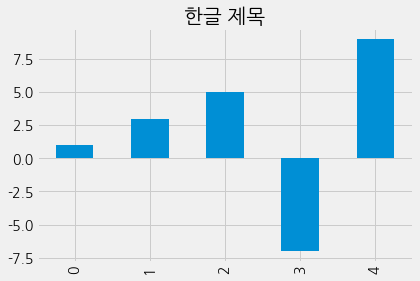

In [5]:
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다.
# plt.style.use 로 "fivethirtyeight" 스타일을 사용해 봅니다.

import matplotlib.pyplot as plt

plt.rc("font", family="NanumGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

pd.Series([1, 3, 5, -7, 9]).plot.bar(title="한글 제목")

In [6]:
#file_name 변수에 read_html로 저장한 파일명을 지정해 준다.
file_name = f"seoul-covid19-2021-02-11.csv"
file_name

'seoul-covid19-2021-02-11.csv'

In [10]:
#read_csv로 csv 파일 불러오기
df=pd.read_csv(file_name,encoding="utf-8")
df.shape

(25885, 7)

### 시각화 선명하기 설정하기

In [11]:
#retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명하게 보인다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

### 확진일

In [12]:
#확진일의 빈도수를 본다. 어느 날짜에 가장 많이 확진이 되었는지 본다.

df["확진일"].value_counts()

2020-12-17    588
2020-12-24    566
2020-12-28    525
2020-12-25    431
2020-12-16    427
             ... 
2020-05-01      1
2020-04-15      1
2020-04-24      1
2020-04-18      1
2020-04-30      1
Name: 확진일, Length: 354, dtype: int64

In [13]:
#확진일 컬럼의 데이터 형태 확인
df["확진일"].head(1)

0    2021-02-11
Name: 확진일, dtype: object

In [14]:
#데이터 타입을 변경해서 날짜 형태로 변경

df["확진일"] = pd.to_datetime(df["확진일"])
df["확진일"].head()

0   2021-02-11
1   2021-02-11
2   2021-02-11
3   2021-02-11
4   2021-02-11
Name: 확진일, dtype: datetime64[ns]

In [15]:
#월만 추출한다.
df["월"] = df["확진일"].dt.month
df[["확진일","월"]].tail()

,확진일,월
25880,2020-01-31,1
25881,2020-01-30,1
25882,2020-01-30,1
25883,2020-01-30,1
25884,2020-01-24,1


In [16]:
df[["확진일","월"]].head()

,확진일,월
0,2021-02-11,2
1,2021-02-11,2
2,2021-02-11,2
3,2021-02-11,2
4,2021-02-11,2


In [37]:
#연월을 표시한다.
df["연월"]=df["확진일"].dt.to_period(freq = 'M')
df[["확진일","연월"]].head()

,확진일,연월
0,2021-02-11,2021-02
1,2021-02-11,2021-02
2,2021-02-11,2021-02
3,2021-02-11,2021-02
4,2021-02-11,2021-02


## 선그래프 그리기

- value_counts(): unique 값별로 개수를 센다
- sort_index(): 인덱스를 기준으로 데이터를 정렬한다.
- axhline: 축의 특정 값에 기준선 표시

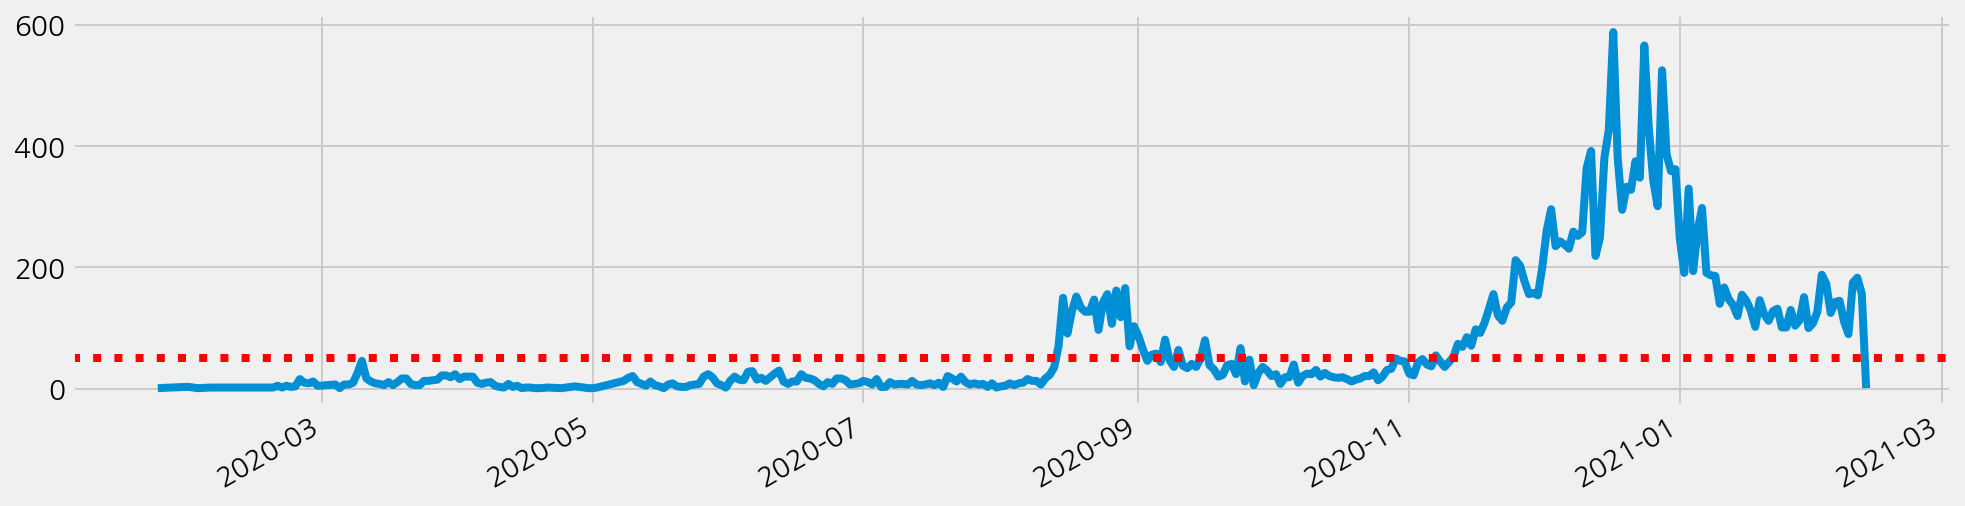

In [17]:
#확진일자로 선그래프를 그립니다. 

df["확진일"].value_counts().sort_index().plot(figsize=(15, 4))
plt.axhline(50, color="red", linestyle=":")

### 선그래프에 값 표시하기

In [44]:
#일자별 확진자수를 선그래프로 그린다.
day_count = df["확진일"].astype(str).value_counts().sort_index()
day_count.iloc[2]

3

In [45]:
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 200:
        print(i, case_count)

274 212
275 203
281 261
282 296
283 235
284 243
285 238
286 231
287 259
288 252
289 258
290 364
291 392
292 219
293 249
294 381
295 427
296 588
297 381
298 295
299 333
300 328
301 375
302 348
303 566
304 431
305 344
306 301
307 525
308 387
309 359
310 362
311 248
313 330
315 260
316 298


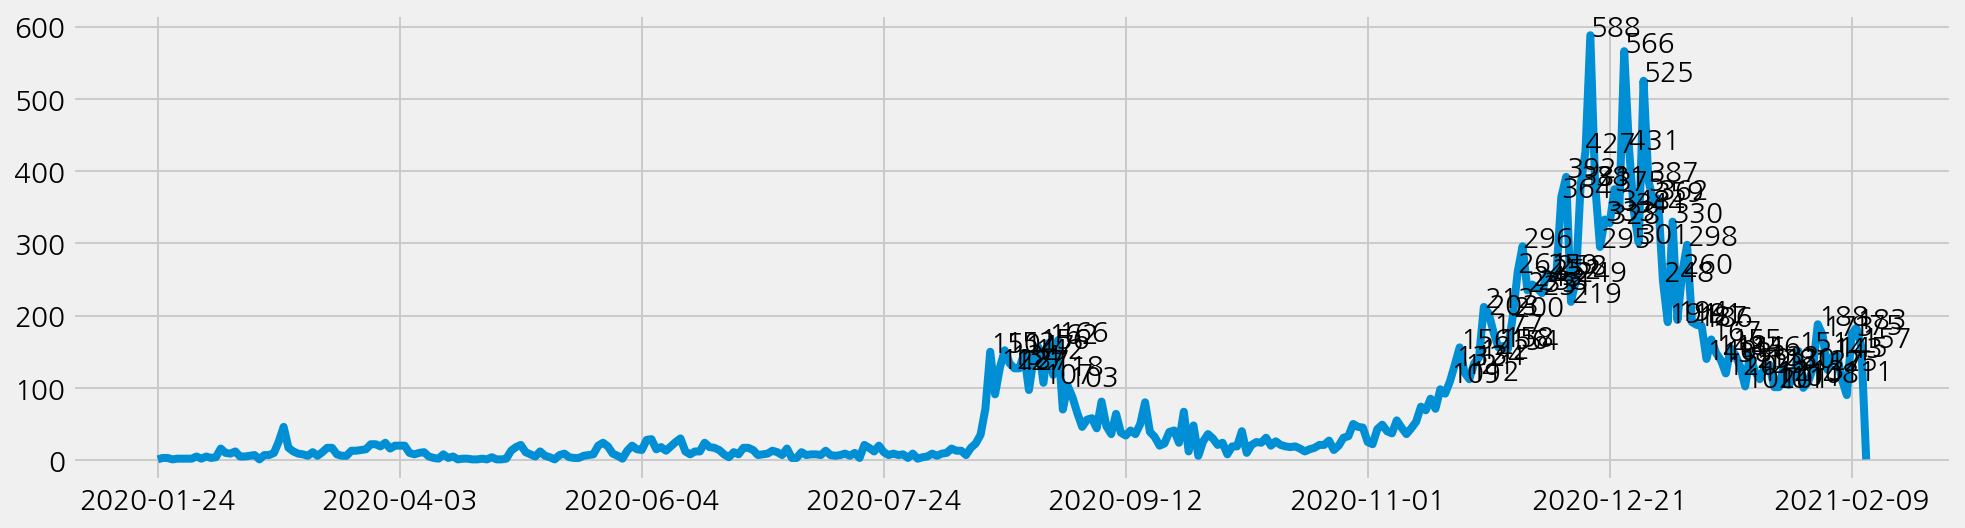

In [47]:
g = day_count.plot(figsize=(15, 4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 100:
        g.text(x=i, y=case_count, s=case_count)

### 확진자가 가장 많이 나온 날

In [21]:
day_count

20-01-24      1
20-01-30      3
20-01-31      3
20-02-02      1
20-02-05      2
           ... 
21-02-08     90
21-02-09    175
21-02-10    183
21-02-11    157
21-02-12      1
Name: 연월일, Length: 354, dtype: int64

In [22]:
#describe 를 통해 일자별 확진자수를 describe를 통해 요약한다.
day_count.describe()

count    354.000000
mean      73.121469
std      103.832915
min        1.000000
25%        9.000000
50%       21.000000
75%      111.750000
max      588.000000
Name: 연월일, dtype: float64

In [23]:
#확진자가 가장 많았던 날을 찾는다
day_count[day_count == day_count.max()]

20-12-17    588
Name: 연월일, dtype: int64

In [24]:
#확진자가 가장 많았던 날의 발생이력을 찾는다.

df[df["연월일"] == "20-12-17"].head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,월,연월일
8787,17098,48368,2020-12-17,타시도,-,감염경로 조사중,퇴원,12,20-12-17
8866,17019,54793,2020-12-17,종로구,-,감염경로 조사중,퇴원,12,20-12-17
11178,14707,49665,2020-12-17,기타,-,동부구치소 관련,NaN,12,20-12-17
11179,14706,49664,2020-12-17,기타,-,동부구치소 관련,퇴원,12,20-12-17
11180,14705,49663,2020-12-17,기타,-,동부구치소 관련,퇴원,12,20-12-17


## 최근 데이터만 슬라이싱으로 나눠 그리기

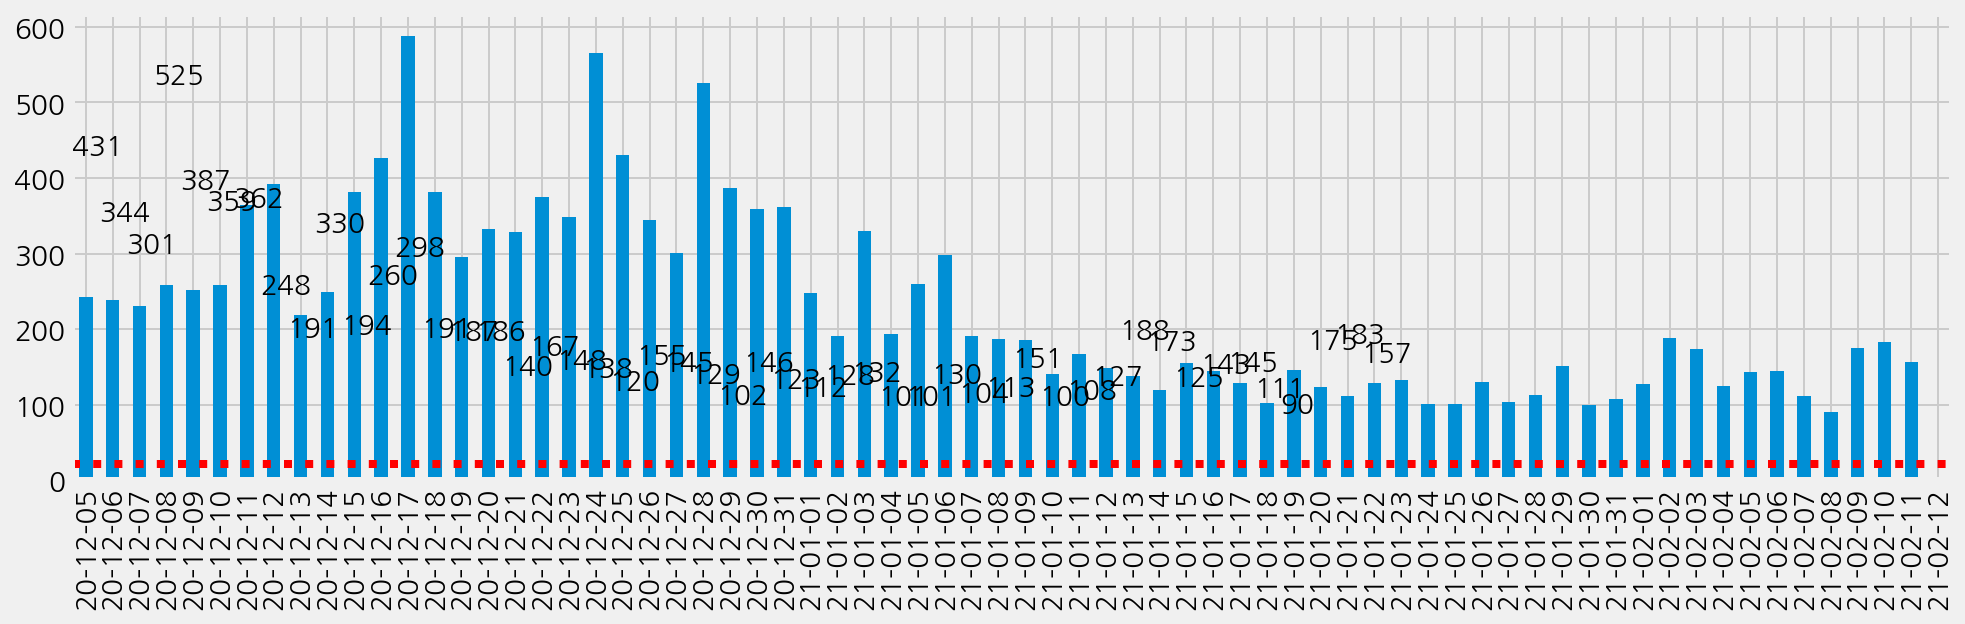

In [25]:
#슬라이싱을 통해 최근 데이터만 그린다.

g = day_count[-70:].plot.bar(figsize=(15, 4))
g.axhline(day_count.median(), linestyle=":", color="red")

for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count > 10:
        g.text(x=i-0.5, y=case_count, s=case_count)

### 최근 그래프를 슬라이싱하여 선그래프로 나타내기

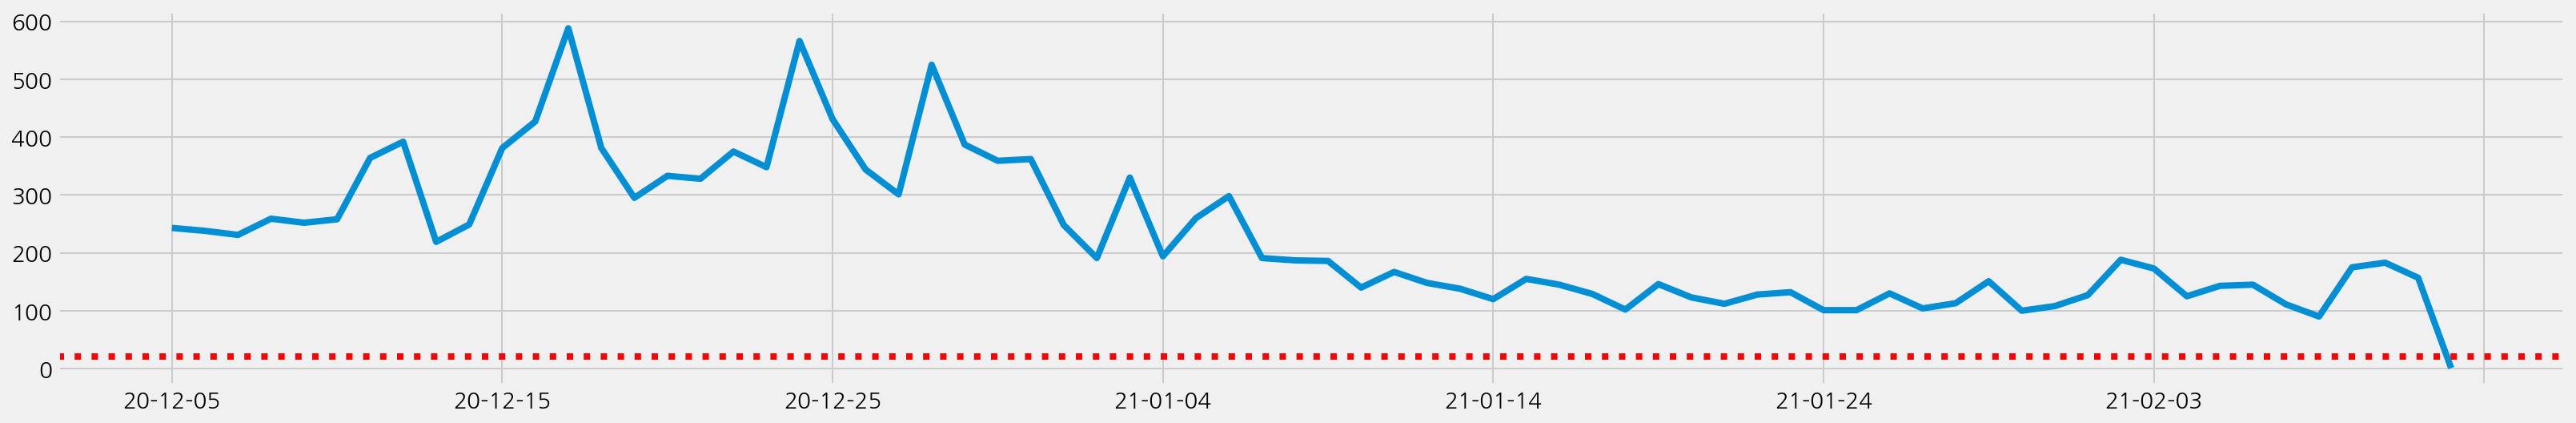

In [34]:
day_count[-70:].plot(figsize=(25, 4))
plt.axhline(day_count.median(), color="red", linestyle=":")

##월별 확진자 수 그리기 

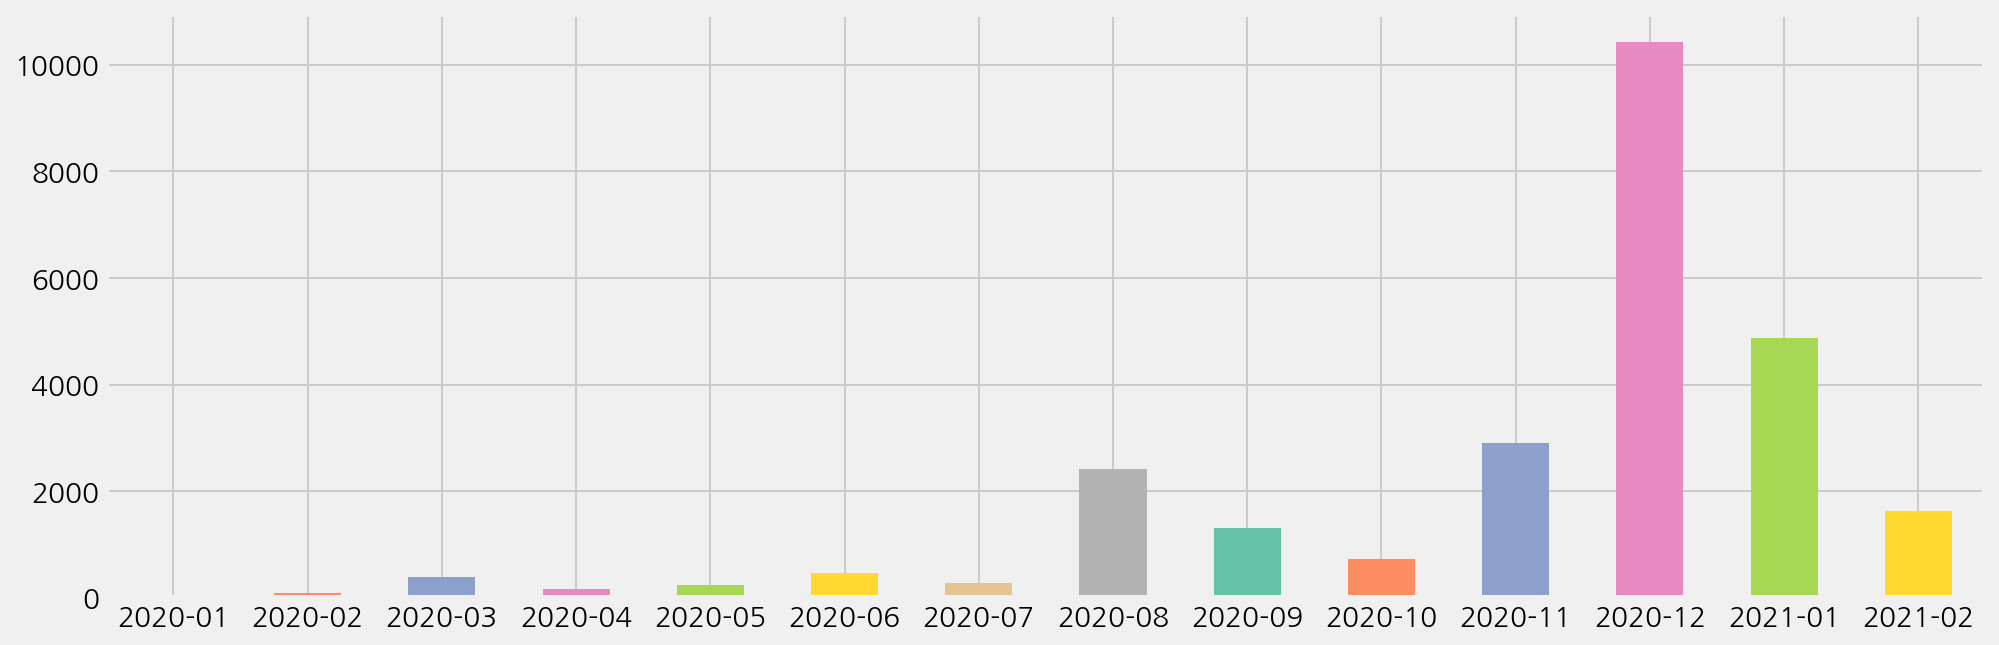

In [58]:
#월별 확진자에 대한 빈도수를 구해서 시각화합니다.
#2020년 1월과 2021년 1월을 구분할 수 있도록 연_월까지 표시합시다.
plt.rcParams["figure.figsize"] = (15, 5)
month_case = df["연월"].value_counts().sort_index()
colors = sns.color_palette("Set2",len(month_case))
g = month_case.plot.bar(rot=0,color=colors)

## 모든 날짜를 행에 만들어 주기

- 확진자가 없는 날의 데이터도 만들어 줍니다.

In [59]:
#첫 확진일 부터 마지막 확진일까지 가져온다.
#데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담는다.

%timeit  
first_day = df.iloc[-1, 2]
first_day

Timestamp('2020-01-24 00:00:00')

In [62]:
%timeit 
last_day = df.iloc[0, 2]
last_day

Timestamp('2021-02-11 00:00:00')

In [63]:
#pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 DatetimeIndex 를 만들고 days 라는 변수에 저장한다.

days = pd.date_range(first_day, last_day)
days[:5]

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28'],
              dtype='datetime64[ns]', freq='D')

In [77]:
days[5:]

DatetimeIndex(['2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
               '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07',
               ...
               '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11'],
              dtype='datetime64[ns]', length=380, freq='D')

In [64]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만든다.
# days.to_frame()
df_days =  pd.DataFrame({"확진일자": days})
df_days.head()

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [78]:
df_days.tail()

,확진일자
380,2021-02-07
381,2021-02-08
382,2021-02-09
383,2021-02-10
384,2021-02-11


In [65]:
# 확진일자별로 빈도수 구하기
daily_case = df_days["확진일자"].value_counts()
daily_case.head()

2020-03-13    1
2020-10-23    1
2020-05-30    1
2020-04-29    1
2020-03-29    1
Name: 확진일자, dtype: int64

In [76]:
daily_case.tail()

2020-05-29    1
2020-04-28    1
2020-03-28    1
2020-02-26    1
2020-02-11    1
Name: 확진일자, dtype: int64

In [66]:
# 확진일자별로 빈도수 구한 내용을 데이터프레임으로 변환하기

df_daily_case = daily_case.to_frame()
df_daily_case.head()

,확진일자
2020-03-13,1
2020-10-23,1
2020-05-30,1
2020-04-29,1
2020-03-29,1


In [67]:
# value_counts 결과의 컬럼명을 "확진수"로 바꾸기

df_daily_case.columns = ["확진수"]
df_daily_case.head()

,확진수
2020-03-13,1
2020-10-23,1
2020-05-30,1
2020-04-29,1
2020-03-29,1


## merge를 통해 전체 확진일자 만들기

In [68]:
#확진자가 없는 날도 일자에 표현이 되도록 전체 일자와 확진 데이터를 merge 로 합쳐준다.
all_day = df_days.merge(df_daily_case, 
                        left_on="확진일자", 
                        right_on=df_daily_case.index, how="left")
all_day.head()

,확진일자,확진수
0,2020-01-24,1
1,2020-01-25,1
2,2020-01-26,1
3,2020-01-27,1
4,2020-01-28,1


## 누적 확진자 수 구하기

In [69]:
#확진수를 fillna를 통해 결측치를 0으로 채워주고 누적해서 더한다.
all_day["누적확진"] = all_day["확진수"].fillna(0).cumsum()
all_day

,확진일자,확진수,누적확진
0,2020-01-24,1,1
1,2020-01-25,1,2
2,2020-01-26,1,3
3,2020-01-27,1,4
4,2020-01-28,1,5
...,...,...,...
380,2021-02-07,1,381
381,2021-02-08,1,382
382,2021-02-09,1,383
383,2021-02-10,1,384


In [70]:
#연도를 제외하고 월-일로 "일자" 컬럼 만들기

all_day["일자"] = all_day["확진일자"].astype(str).map(lambda x : x[-5:])
all_day.head()

,확진일자,확진수,누적확진,일자
0,2020-01-24,1,1,01-24
1,2020-01-25,1,2,01-25
2,2020-01-26,1,3,01-26
3,2020-01-27,1,4,01-27
4,2020-01-28,1,5,01-28


In [71]:
#"확진수", "누적확진" 컬럼을 갖는 데이터프레임을 만듭니다.
cum_day = all_day[["일자", "확진수", "누적확진"]]
cum_day = cum_day.set_index("일자")
cum_day.head()

,확진수,누적확진
일자,,
01-24,1,1
01-25,1,2
01-26,1,3
01-27,1,4
01-28,1,5


In [75]:
cum_day.tail()

,확진수,누적확진
일자,,
02-07,1,381
02-08,1,382
02-09,1,383
02-10,1,384
02-11,1,385


### 데이터프레임으로 그리기

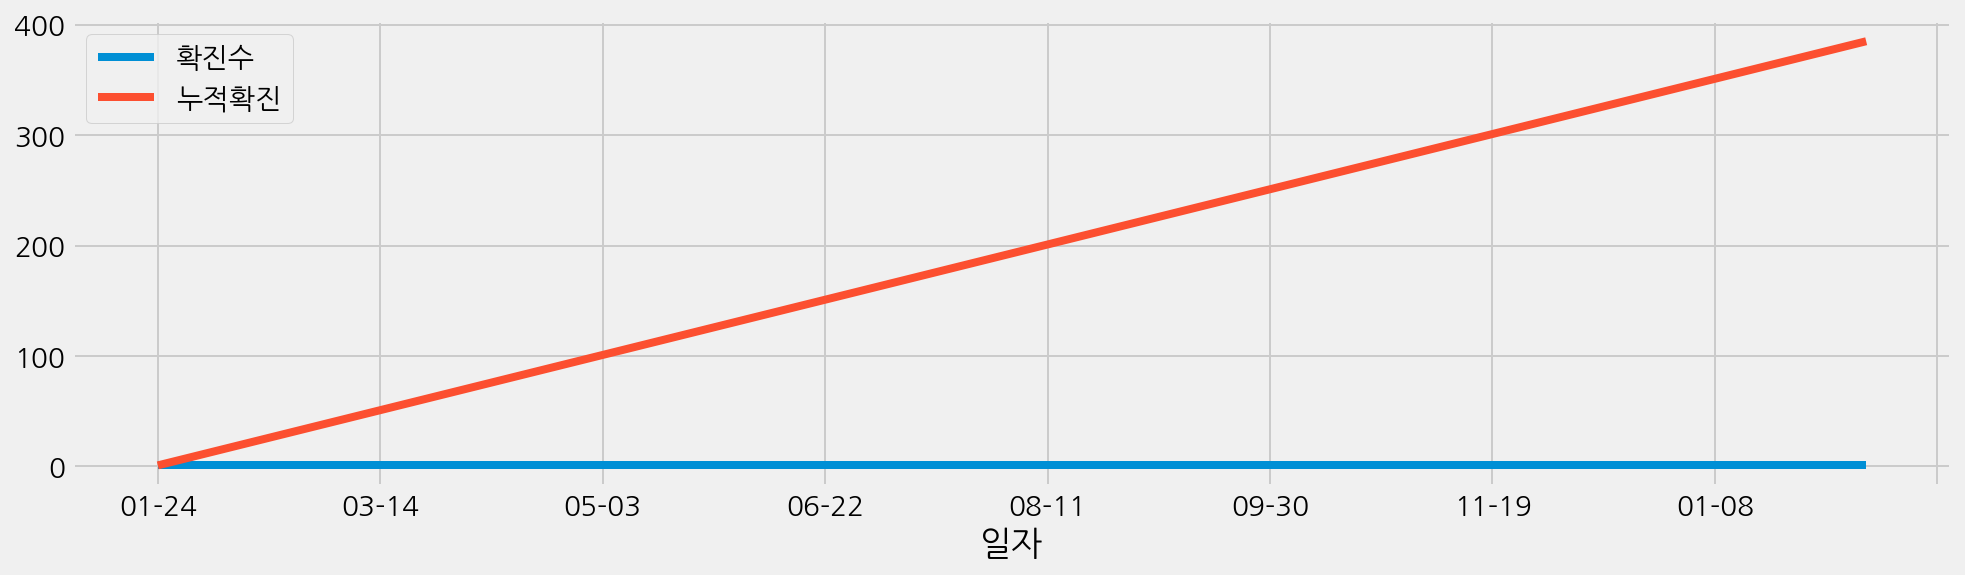

In [72]:
#데이터프레임으로 확진수와 누적확진을 선그래프로 그린다.

cum_day.plot(figsize=(15, 4))

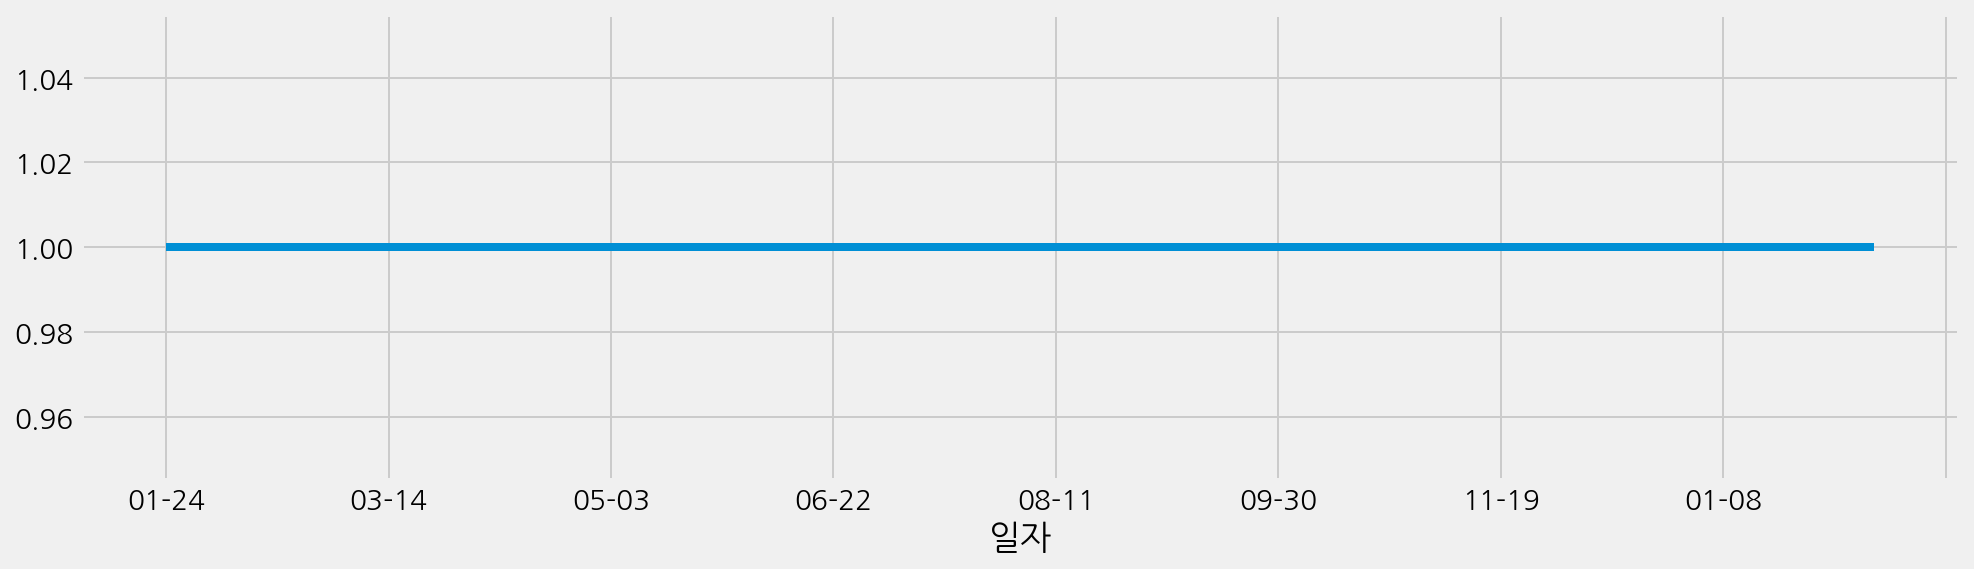

In [74]:
#누적확진수와 확진수와 차이가 크면 제대로 보이지 않기 때문에 확진수만 그린다.
cum_day["확진수"].plot(figsize=(15, 4))

## 거주지별 확진자

In [80]:
#거주지(구별) 확진자의 빈도수를 구하고 시각화 합니다.

gu_count = df["거주지"].value_counts()
gu_count.head()

기타     1934
강서구    1597
송파구    1436
관악구    1253
타시도    1216
Name: 거주지, dtype: int64

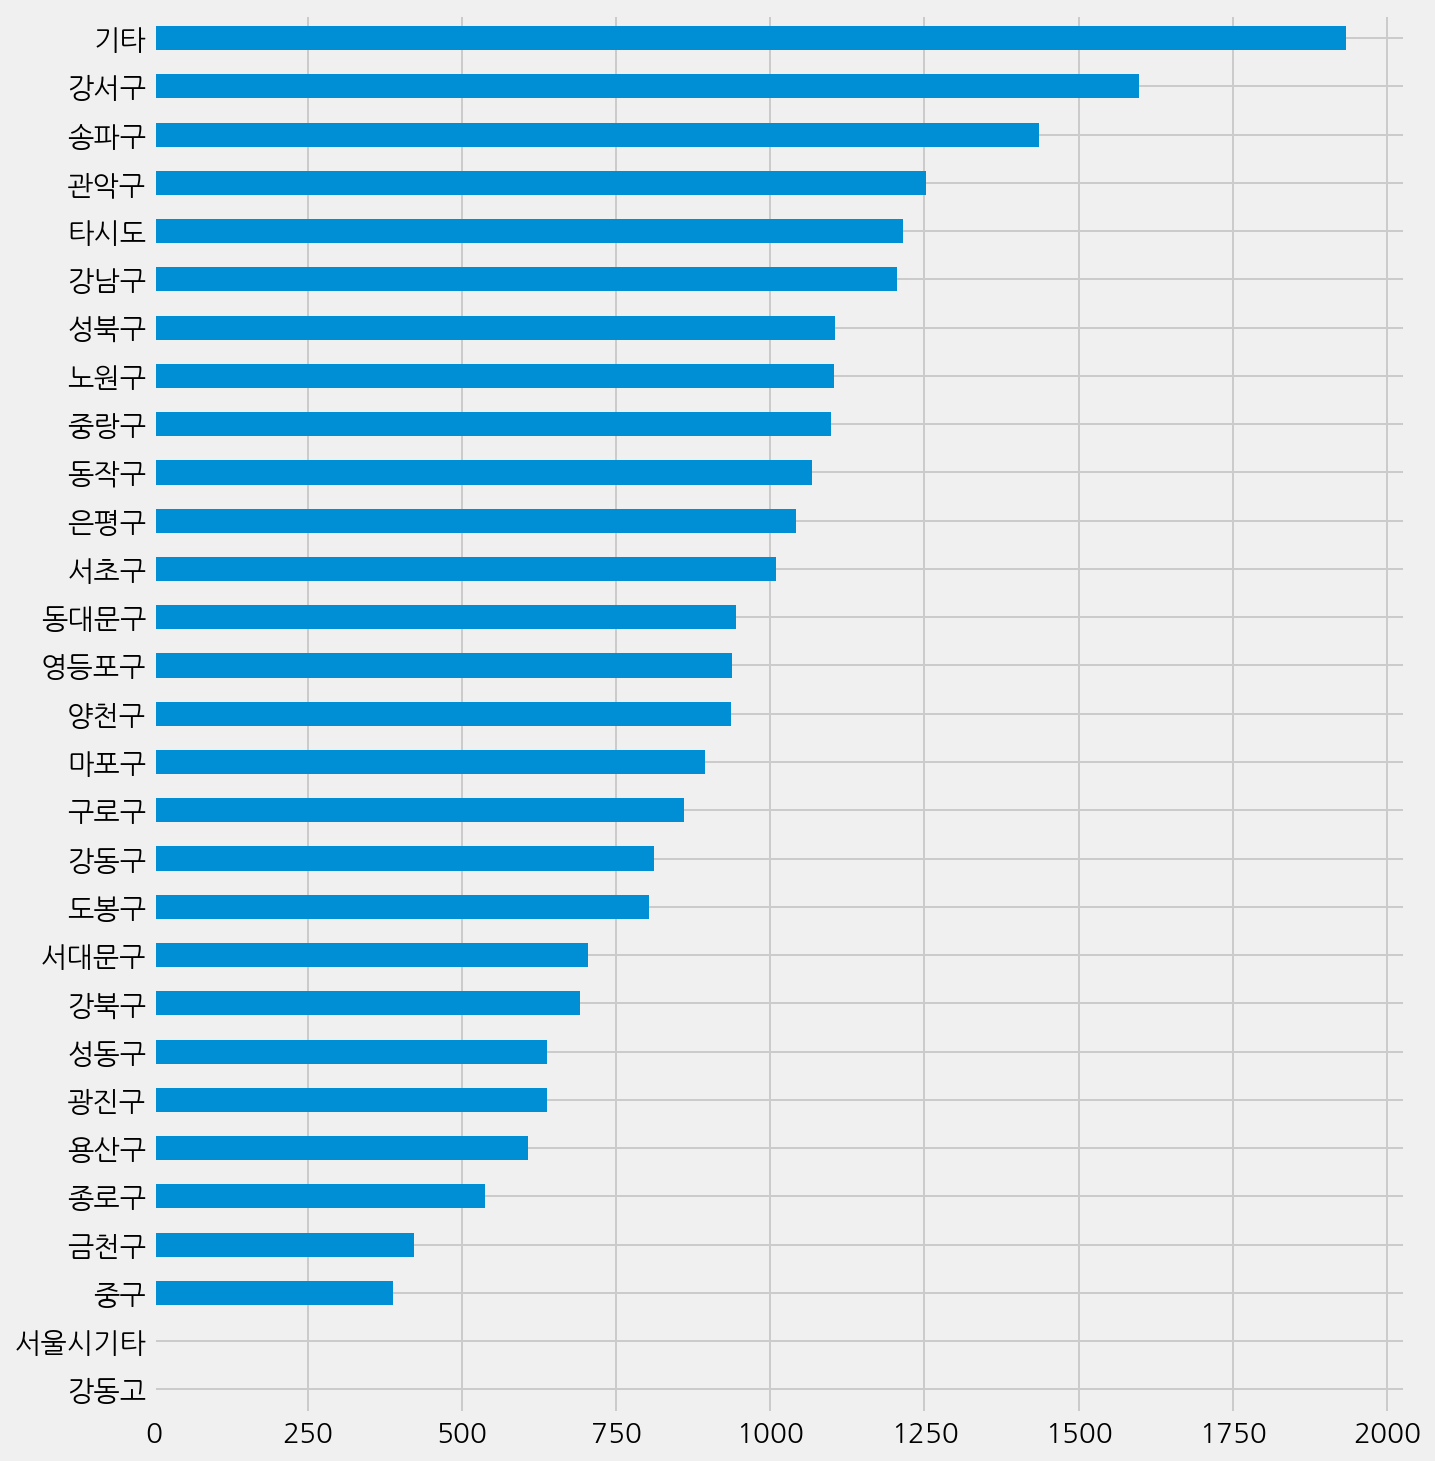

In [81]:
#구별 확진자의 수를 시각화한다.

gu_count.sort_values().plot.barh(figsize=(10, 12))

In [82]:
#서울에서 확진판정을 받은 데이터이기 때문에 거주지가 서울이 아닐 수도 있다.
#거주지 별로 서울시에 해당되는 데이터만 따로 가져온다.

gu = gu_count[:27].index
gu

Index(['기타', '강서구', '송파구', '관악구', '타시도', '강남구', '성북구', '노원구', '중랑구', '동작구',
       '은평구', '서초구', '동대문구', '영등포구', '양천구', '마포구', '구로구', '강동구', '도봉구', '서대문구',
       '강북구', '성동구', '광진구', '용산구', '종로구', '금천구', '중구'],
      dtype='object')

In [83]:
#거주지가 서울이 아닌 지역을 따로 추출합니다.

set(gu_count.index) - set(gu)

{'강동고', '서울시기타'}

'강동고'는 '강동구'의 오타로 보인다. '서울시기타' 역시 '기타'항목에 넣어주면 될 것 같다.

In [191]:
df.loc[df["거주지"]=="강동고"]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,월,연월,해외
243,25642,82068,2021-02-10,강동고,-,기타 확진자 접촉,NaN,2,2021-02,NaN


In [192]:
df.loc[df["거주지"]=='서울시기타']

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,월,연월,해외
318,25567,82027,2021-02-10,서울시기타,인도네시아,해외유입,NaN,2,2021-02,인도네시아


In [193]:
#강동고를 강동구로 고치기
df.loc[df["거주지"]=="강동고","거주지"]='강동구'

In [196]:
#'서울시기타'를 '기타'로 고치기
df.loc[df["거주지"]=="서울시기타","거주지"]='기타'

In [195]:
df.loc[df["연번"]==25642]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,월,연월,해외
243,25642,82068,2021-02-10,강동구,-,기타 확진자 접촉,NaN,2,2021-02,NaN


In [197]:
df.loc[df["연번"]==25567]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,월,연월,해외
318,25567,82027,2021-02-10,기타,인도네시아,해외유입,NaN,2,2021-02,인도네시아


In [198]:
gu = gu_count[:27].index
gu

Index(['기타', '강서구', '송파구', '관악구', '타시도', '강남구', '성북구', '노원구', '중랑구', '동작구',
       '은평구', '서초구', '동대문구', '영등포구', '양천구', '마포구', '구로구', '강동구', '도봉구', '서대문구',
       '강북구', '성동구', '광진구', '용산구', '종로구', '금천구', '중구'],
      dtype='object')

In [203]:
#구를 전처리 하기 쉽게 컬럼으로 변환하기 위해 reset_index 로 변환.
df_gu = gu_count.reset_index()
df_gu.columns = ["구", "확진수"]
df_gu.head()

,구,확진수
0,기타,1934
1,강서구,1597
2,송파구,1436
3,관악구,1253
4,타시도,1216


### mapbox 라이브러리 이용하여 자치구별 확진자 cloropeleth map으로 시각화하기

In [245]:
#mapbox 설치
!pip install mapboxgl

     |████████████████████████████████| 51kB 3.4MB/s 
  Created wheel for chroma-py: filename=chroma_py-0.1.0.dev1-cp36-none-any.whl size=5105 sha256=c669a4ace52f573bc170b6f11ab29288a08c6e49d3027993a229f5c9e06f05a4
  Stored in directory: /root/.cache/pip/wheels/43/3b/8c/3f6d7536b8bef26b7c3be5989f8103513eb949e50a4f9f81cf
Successfully built chroma-py


In [246]:
import mapboxgl
mapboxgl.__version__

'0.10.2'

In [247]:
from mapboxgl.viz import *

In [248]:
geo_data = 'gu_etc_count.json'

# 파일을 파이썬에서 읽습니다.
import json
with open(geo_data) as f:
    data = json.loads(f.read())

In [249]:
API_token = 'pk.eyJ1Ijoic29oaGhvIiwiYSI6ImNrbDJlbnZpNDBjZncycG1ya21oeDhqZHEifQ.b_ERpzaVDizknvWcB6-paQ'

In [259]:
import os
from mapboxgl.utils import create_color_stops
from mapboxgl.utils import create_numeric_stops

#중심부
center=[126.986,37.565]
color_breaks = [0, 300, 600, 900, 1200, 1500]
color_stops = create_color_stops(color_breaks,colors='BuPu')

#choroplethViz
viz = ChoroplethViz(
    access_token=API_token,
    data=data,
    color_property='confirmed',
    center=center,
    color_stops=color_stops,
    zoom=10)

viz.beading = -15 #-15만큼 좌우회전
viz.pitch = 45 #45만큼 상하 회전

#데이터에 '인구' 기준으로 height_property 값 준다
viz.height_property = 'confirmed'
#높이의 값을 인구에 따라 0-1500사이의 값을 0-3000 사이의 height 값으로 매핑한다.
numeric_stops = create_numeric_stops([0, 300, 600, 900, 1200, 1500], 0, 3000)
viz.height_stops = numeric_stops
viz.height_function_type = 'interpolate'
viz.show()

## 접촉력

In [87]:
#접촉력 빈도수를 구한다.
df["접촉력"].value_counts().head(15)

기타 확진자 접촉             8091
감염경로 조사중              6037
동부구치소 관련              1175
타시도 확진자 접촉            1095
해외유입                   843
성북구 사랑제일교회 관련          641
강서구 교회 관련              246
종로구 소재 파고다타운 관련        227
구로구 소재 요양병원/요양원 관련     226
강서구 댄스교습관련 시설          224
이태원 클럽 관련              139
8.15서울도심집회             126
마포구 홍대새교회 관련           109
Ace 손해보험                98
병원 및 요양시설               92
Name: 접촉력, dtype: int64

In [88]:
#접촉력의 unique 값만 구한다.

df["접촉력"].unique()

array(['감염경로 조사중', '해외유입', '송파구 가족 관련', '기타 확진자 접촉', '은평구 소재 요양시설 관련',
       '중구 제조업 공장2 관련', '용산구 소재 지인 모임 관련', '병원 및 요양시설', '성북구 스포츠 센터 관련',
       '광진구 소재 음식점 관련', '타시도 확진자 접촉', '중구 소재 콜센터4 관련', '강동구 소재 사우나 관련',
       "성동구 소재 병원 관련('21.1월)", '강북구 소재 사우나 관련', '중구 소재 복지시설 관련',
       "성동구 소재 병원 관련(\\'21.1월)", '동대문구 소재 병원 관련', '서대문구 소재 운동시설 관련',
       '도봉구 소재 교회 관련', '강남구 문화교습소 관련', '노원구 소재 요양시설 관련', '중랑구 소재 아동관련 시설',
       '강동구 소재 한방병원 관련', '동작구 소재 병원 관련', '금천구 소재 보험회사 관련',
       '노원구 소재 어린이집 관련', '동대문구 소재 공공기관 관련', '구로구 소재 교정시설 관련',
       '강남구 소재 직장3 관련', '영등포구 소재 의료기관2 관련', '기타 확진자 접촉(동작구 소재 병원 관련)',
       '용산구 소재 미군기지 관련', '성동구 소재 거주시설/요양시설 관련', '관악구 소재 의료기관 관련',
       '도축 및 육류가공업 관련', '기타확진자 접촉', '성북구 소재 사우나 관련', '동대문구 소재 고시텔 관련',
       '도봉구 소재 직장2 관련', '종로구 소재 직장2 관련', '기타확진자접촉', '동대문구 소재 직장 관련',
       '중구 소재 직장2 관련', '성동구 소재 사우나 관련', '강남구 소재 선교회 교육시설 관련',
       '은평구 소재 병원2 관련', '서대문구 소재 의료기관/종교시설 관련', '강남구 소재 직장2 관련',
       '강남구 소재 직장4 관련', '종로구 소재 직장관련', '종로구 소재 빌딩관

In [96]:
#"조사" 가 들어가는 접촉력만 찾는다. 

df.loc[df["접촉력"].str.contains("조사"), "접촉력"].unique()

array(['감염경로 조사중'], dtype=object)

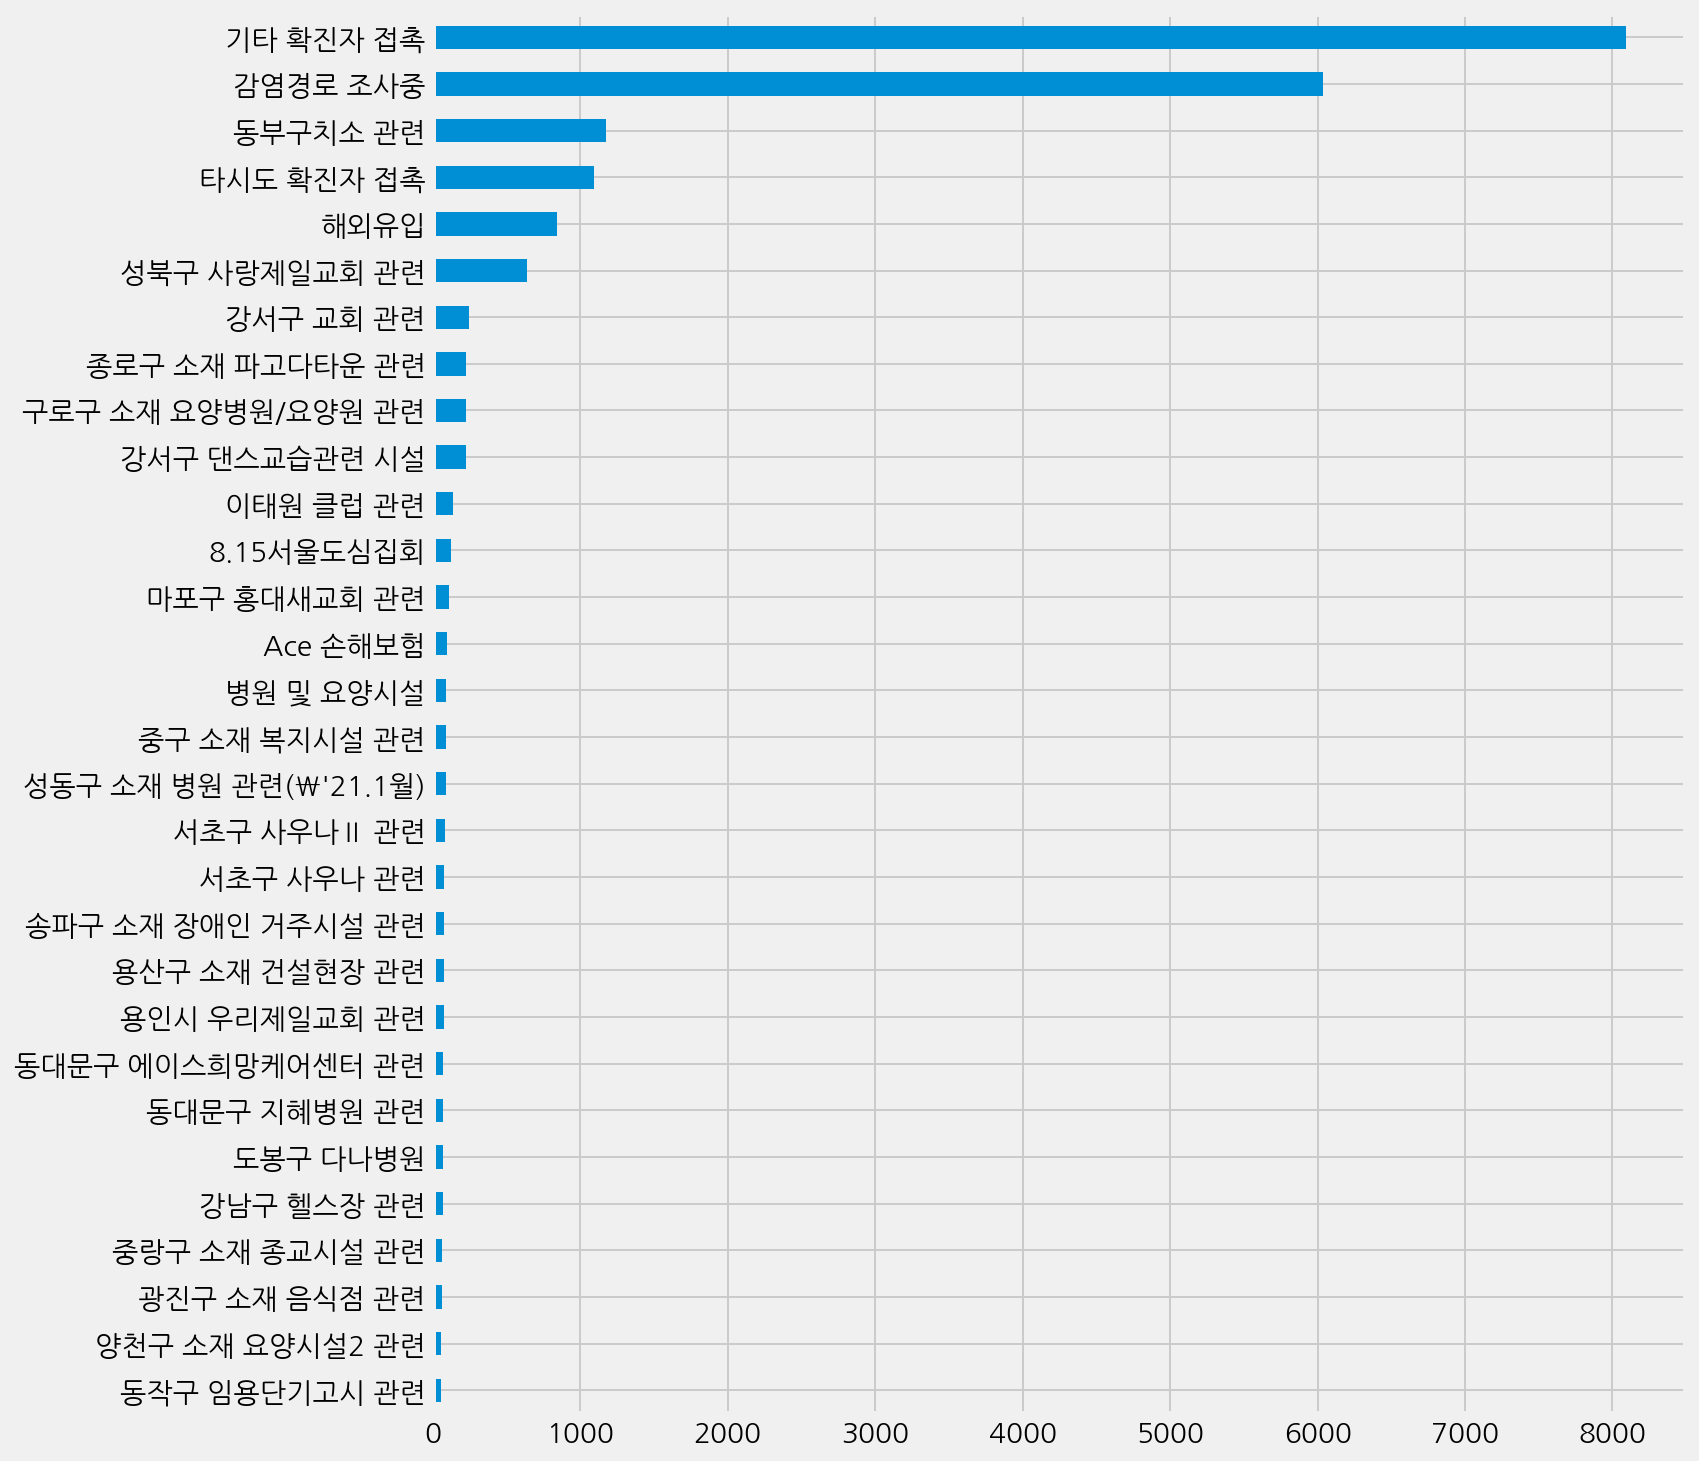

In [98]:
#접촉력 빈도수를 시각화한다.

contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(30)
contact_count_top.plot.barh(figsize=(10, 12))

In [158]:
#상위 15개만 구한다. 
top_contact = contact_count_top.sort_values().tail(15)
top_contact

병원 및 요양시설               92
Ace 손해보험                98
마포구 홍대새교회 관련           109
8.15서울도심집회             126
이태원 클럽 관련              139
강서구 댄스교습관련 시설          224
구로구 소재 요양병원/요양원 관련     226
종로구 소재 파고다타운 관련        227
강서구 교회 관련              246
성북구 사랑제일교회 관련          641
해외유입                   843
타시도 확진자 접촉            1095
동부구치소 관련              1175
감염경로 조사중              6037
기타 확진자 접촉             8091
Name: 접촉력, dtype: int64

In [159]:
#접촉력 빈도수가 높은 목록에 대한 index.
top_contact.index

Index(['병원 및 요양시설', 'Ace 손해보험', '마포구 홍대새교회 관련', '8.15서울도심집회', '이태원 클럽 관련',
       '강서구 댄스교습관련 시설', '구로구 소재 요양병원/요양원 관련', '종로구 소재 파고다타운 관련', '강서구 교회 관련',
       '성북구 사랑제일교회 관련', '해외유입', '타시도 확진자 접촉', '동부구치소 관련', '감염경로 조사중',
       '기타 확진자 접촉'],
      dtype='object')

In [160]:
#위에서 구한 top_contact 에 해당되는 데이터만 isin으로 가져온다. 
top_group = df[df["접촉력"].isin(top_contact.index)]
top_group.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,월,연월,해외
0,25885,82811,2021-02-11,용산구,-,감염경로 조사중,NaN,2,2021-02,NaN
1,25884,82768,2021-02-11,서대문구,미국,해외유입,NaN,2,2021-02,미국
2,25883,82789,2021-02-11,서초구,-,감염경로 조사중,NaN,2,2021-02,NaN
4,25881,82796,2021-02-11,구로구,-,감염경로 조사중,NaN,2,2021-02,NaN
5,25880,82802,2021-02-11,구로구,-,기타 확진자 접촉,NaN,2,2021-02,NaN


In [161]:
# 접촉력, 월별 빈도수를 groupby 로 구합니다.
top_group.groupby(["접촉력", "월"])["연번"].count().unstack().fillna(0).astype(int)

월,1,2,3,4,5,6,7,8,9,10,11,12
접촉력,,,,,,,,,,,,
8.15서울도심집회,0,0,0,0,0,0,0,113,13,0,0,0
Ace 손해보험,0,0,97,1,0,0,0,0,0,0,0,0
감염경로 조사중,1351,430,41,16,5,66,49,440,286,120,474,2759
강서구 교회 관련,1,0,0,0,0,0,0,0,0,0,0,245
강서구 댄스교습관련 시설,0,0,0,0,0,0,0,0,0,0,182,42
구로구 소재 요양병원/요양원 관련,27,0,0,0,0,0,0,0,0,0,0,199
기타 확진자 접촉,1936,608,21,9,0,14,33,440,304,116,631,3979
동부구치소 관련,242,0,0,0,0,0,0,0,0,0,3,930
마포구 홍대새교회 관련,0,0,0,0,0,0,0,0,0,0,96,13


### 도넛차트로 그리기

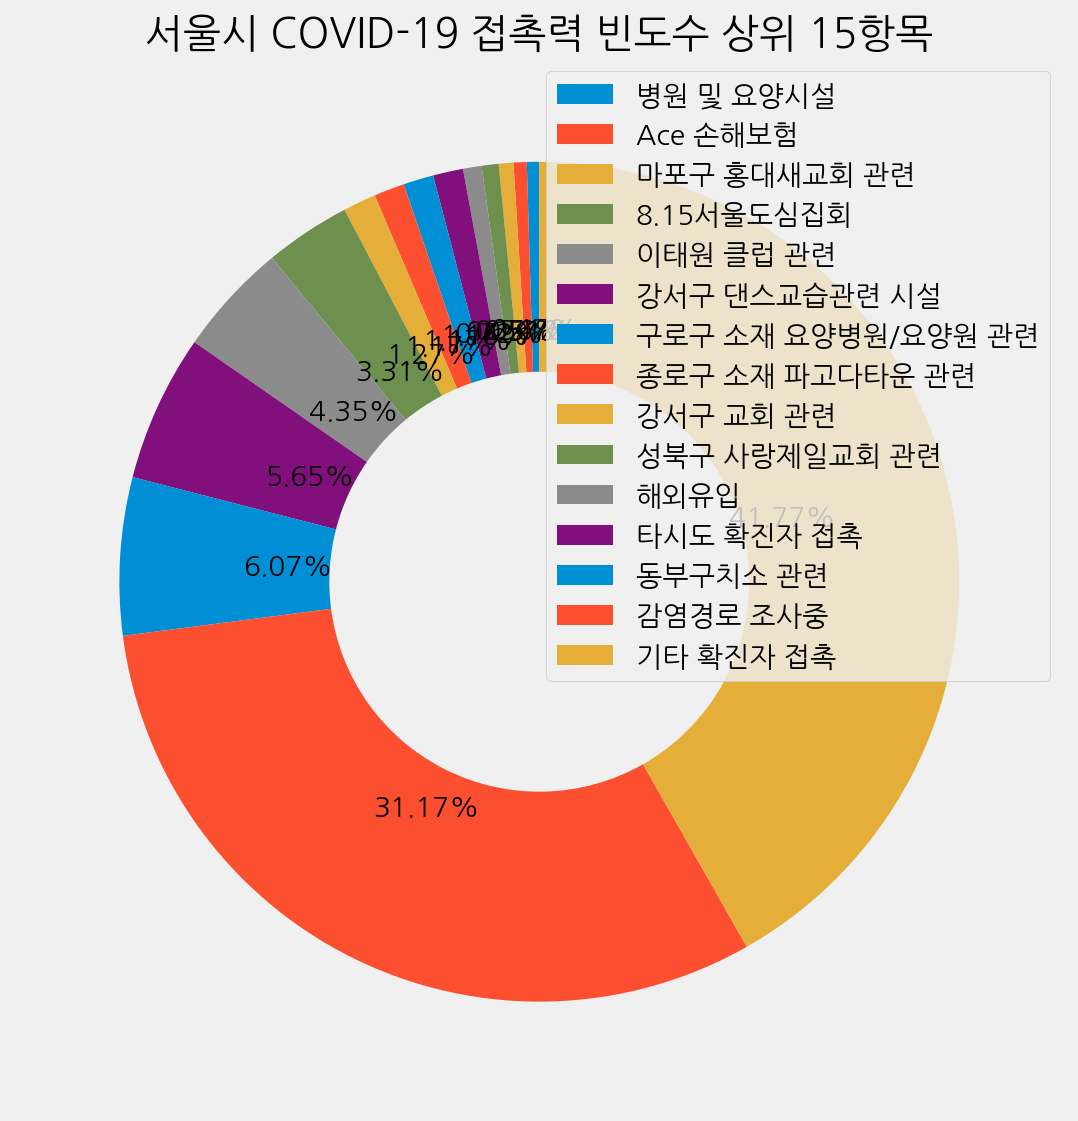

In [162]:
#서울시 COVID-19 접촉력 빈도수 상위 15항목을 도넛차트로 그린다.
label = top_contact.index

data = top_contact


fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot()

pie = ax.pie(data, startangle=90, autopct=lambda p : '{:.2f}%'.format(p),
             wedgeprops=dict(width=0.5)) #도넛 차트의 반지름
 

plt.legend(pie[0],labels,loc='upper right') #범례
ax.set_title("서울시 COVID-19 접촉력 빈도수 상위 15항목")
plt.show()

기타 확진자 접촉, 감염 경로 조사 중을 제외하고는 동부 구치소 관련이 가장 높게 나타났음을 확인할 수 있다.

## 여행력

In [139]:
df["해외"] = df["여행력"]
df["해외"] = df["해외"].str.strip()
df["해외"] = df["해외"].replace("-", np.nan)
df["해외"].nunique()

104

In [140]:
df["해외"].describe()

count     838
unique    104
top        미국
freq      293
Name: 해외, dtype: object

In [141]:
df["해외"].value_counts().head(10)

미국        293
영국         58
필리핀        30
러시아        29
일본         24
인도네시아      23
프랑스        22
인도         19
우즈베키스탄     19
캐나다        14
Name: 해외, dtype: int64

In [142]:
# "해외" 컬럼의 값이 결측치가 아닌 데이터만 가져와서 df_oversea라는 새로운 데이터프레임에 담는다. 
df_oversea = df[df["해외"].notnull()].copy()
df_oversea.shape

(838, 10)

In [143]:
df_oversea["해외"].unique()

array(['미국', '시에라리온', '리투아니아', '헝가리', '인도네시아', '에티오피아', '네팔', '이탈리아',
       '인도', '러시아', '파키스탄', '캐나다', '벨기에', '멕시코', '파라과이', '일본', '필리핀',
       '중국', '나이지리아', '오스트리아', '스페인', 'UAE', '이라크', '덴마크', '우즈베키스탄',
       '콩고민주공화국', '프랑스', '독일', '아이티공화국', '터키', '탄자니아', '영국', '아랍에미리트',
       '이집트', '스리랑카', '폴란드', '에콰도르', '캄보디아', '싱가포르', '르완다', '미얀마', '콩고',
       '모로코', '우크라이나', '스웨덴', '브라질', '방글라데시', '시리아', '두바이', '호주', '몰타',
       '남아공', '알제리', '가나', '알바니아', '핀란드', '네덜란드', '아르헨티나', '가봉',
       '사우디아라비아', '쿠웨이트', '크로아티아', '28238', '케냐', '수단', '루마니아', '튀니지',
       '에디오피아', '키르기스스탄', '이란', '체코', '요르단', '우간다', '카타르', '키르기즈스탄',
       '멕시코, 미국', '카자흐스탄', '21263', '베트남', '홍콩', '모로코, 터키', '미국, 멕시코',
       '페루', '아일랜드', '아프리카', '프랑스, 스페인, 이탈리아, 독일, 네덜란드', '오세아니아',
       '호주, 인도네시아', '포르투갈', '유럽', '미국, 캐나다, 멕시코', '미국, 브라질', '태국', '아시아',
       '아르헨티나, 볼리비아, 브라질', '말레이시아, 인도네시아', '브라질,아르헨티아,칠레,볼리비아', '프랑스, 독일',
       '스페인, 카타르', '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스',
       '오스트리아, 모로코, 프랑스

In [144]:
#유럽 지역을 방문했다면 유럽이라고 바꿔주기 위해 국가명을 str.contains 로 검색하기 위한 형태로 만든다.
europe = "체코, 벨기에, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터키, 아일랜드, 리투아니아, 덴마크, 우크라이나, 스웨덴, 몰타, 알바니아, 핀란드, 네덜란드"
europe = europe.replace(", ", "|")
df_oversea[df_oversea["해외"].str.contains(europe)].head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,월,연월,해외
199,25686,82240,2021-02-10,마포구,리투아니아,해외유입,NaN,2,2021-02,리투아니아
245,25640,82228,2021-02-10,금천구,헝가리,해외유입,NaN,2,2021-02,헝가리
434,25451,81676,2021-02-09,용산구,이탈리아,해외유입,NaN,2,2021-02,이탈리아
1047,24838,80119,2021-02-04,종로구,벨기에,해외유입,NaN,2,2021-02,벨기에
1506,24379,78759,2021-02-01,용산구,오스트리아,해외유입,NaN,2,2021-02,오스트리아


In [145]:
#남미 지역에 해당되는 국가명을 str.contains 로 검색하기 위한 형태로 만든다.
south_america = "브라질, 아르헨티아, 칠레, 볼리비아, 멕시코, 페루, 파라과이, 에콰도르"
south_america = south_america.replace(", ", "|")
south_america
df_oversea[df_oversea["해외"].str.contains(south_america)].head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,월,연월,해외
1111,24774,79950,2021-02-04,동작구,멕시코,해외유입,NaN,2,2021-02,멕시코
1290,24595,79645,2021-02-03,마포구,파라과이,해외유입,NaN,2,2021-02,파라과이
3295,22590,72641,2021-01-17,기타,에콰도르,해외유입,NaN,1,2021-01,에콰도르
6011,19874,63708,2021-01-03,강남구,브라질,해외유입,NaN,1,2021-01,브라질
7493,18392,59159,2020-12-29,강서구,멕시코,해외유입,퇴원,12,2020-12,멕시코


In [173]:
#아프리카 대륙에 속한 국가명을 str.contains로 검색하기 위한 형태로 만든다.
africa = "시에라리온, 에티오피아, 나이지리아, 콩코민주공화국, 탄자니아, 이집트, 르완다, 콩고, 시리아, 남아공, 알제리, 가나, 튀니지, 케냐, 가봉"
africa = africa.replace(", ", "|")
df_oversea[df_oversea["해외"].str.contains(africa)].head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,월,연월,해외
17927,7958,2,2020-11-25,기타,가봉,해외유입,퇴원,11,2020-11,가봉


In [176]:
#중복되는 국가나 지역을 특정 텍스트로 변경해서 그룹화하여 빈도수를 세어본다.
#.str.contains와 .loc 사용해서 전처리
df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = "유럽"
df_oversea.loc[df_oversea["해외"].str.contains(south_america), "해외"] = "남미"
df_oversea.loc[df_oversea["해외"].str.contains(africa), "해외"] = "아프리카 대륙"
df_oversea.loc[df_oversea["해외"].str.contains("중국|우한"), "해외"] = "중국"
df_oversea.loc[df_oversea["해외"].str.contains("아랍에미리트"), "해외"] = "UAE"
df_oversea.loc[df_oversea["해외"].str.contains("필리핀"), "해외"] = "필리핀"
df_oversea.loc[df_oversea["해외"].str.contains("미국"), "해외"] = "미국"
df_oversea["해외"].value_counts()

미국              293
유럽              187
남미               35
아프리카 대륙          31
필리핀              30
러시아              29
일본               24
인도네시아            23
인도               19
우즈베키스탄           19
캐나다              14
중국               13
이라크              12
UAE              12
카자흐스탄            10
파키스탄              9
네팔                9
방글라데시             7
사우디아라비아           7
태국                6
키르기스스탄            6
스리랑카              5
쿠웨이트              4
베트남               3
미얀마               3
오세아니아             2
호주                2
루마니아              2
말레이시아, 인도네시아      1
키르기즈스탄            1
이란                1
28238             1
아시아               1
아이티공화국            1
아르헨티나             1
포르투갈              1
호주, 인도네시아         1
크로아티아             1
싱가포르              1
캄보디아              1
우간다               1
요르단               1
수단                1
두바이               1
싱가폴               1
21263             1
카타르               1
에디오피아             1
아프리카              1
홍콩                1


In [177]:
df_oversea["해외"].describe()

count     838
unique     50
top        미국
freq      293
Name: 해외, dtype: object

가장 높은 빈도로 등장하는 텍스트가 미국임을 확인할 수 있다.

In [178]:
#확진일, 해외 별 카운트 수를 구한다.
day_oversea = df_oversea.groupby(["확진일", "해외"])["연번"].count()
day_oversea.head()

확진일         해외 
2020-01-24  중국     1
2020-01-30  중국     2
2020-02-02  중국     1
2020-02-05  싱가폴    1
2020-02-06  중국     2
Name: 연번, dtype: int64

In [204]:
#위에서 구한 값을 바탕으로 지역별 누적 확진수를 구한다.
day_oversea = day_oversea.groupby(level=[1]).cumsum()
day_oversea

확진일         해외     
2020-01-24  중국             1
2020-01-30  중국             4
2020-02-02  중국             8
2020-02-05  싱가폴            1
2020-02-06  중국            14
                       ...  
2021-02-10  미국         23627
            유럽         11105
            인도네시아        256
2021-02-11  미국         23920
            아프리카 대륙      428
Name: 연번, Length: 566, dtype: int64

In [205]:
#위에서 구한 값을 reset_index()를 통해 데이터프레임으로 변경하고 "연변" 칼럼 "확진자수"칼럼으로 변경한다.
df_day_oversea = day_oversea.reset_index()
df_day_oversea = df_day_oversea.rename(columns={"연번":"누적확진수"})
df_day_oversea.head()

,확진일,해외,누적확진수
0,2020-01-24,중국,1
1,2020-01-30,중국,4
2,2020-02-02,중국,8
3,2020-02-05,싱가폴,1
4,2020-02-06,중국,14


In [206]:
oversea_count = df_oversea["해외"].value_counts()

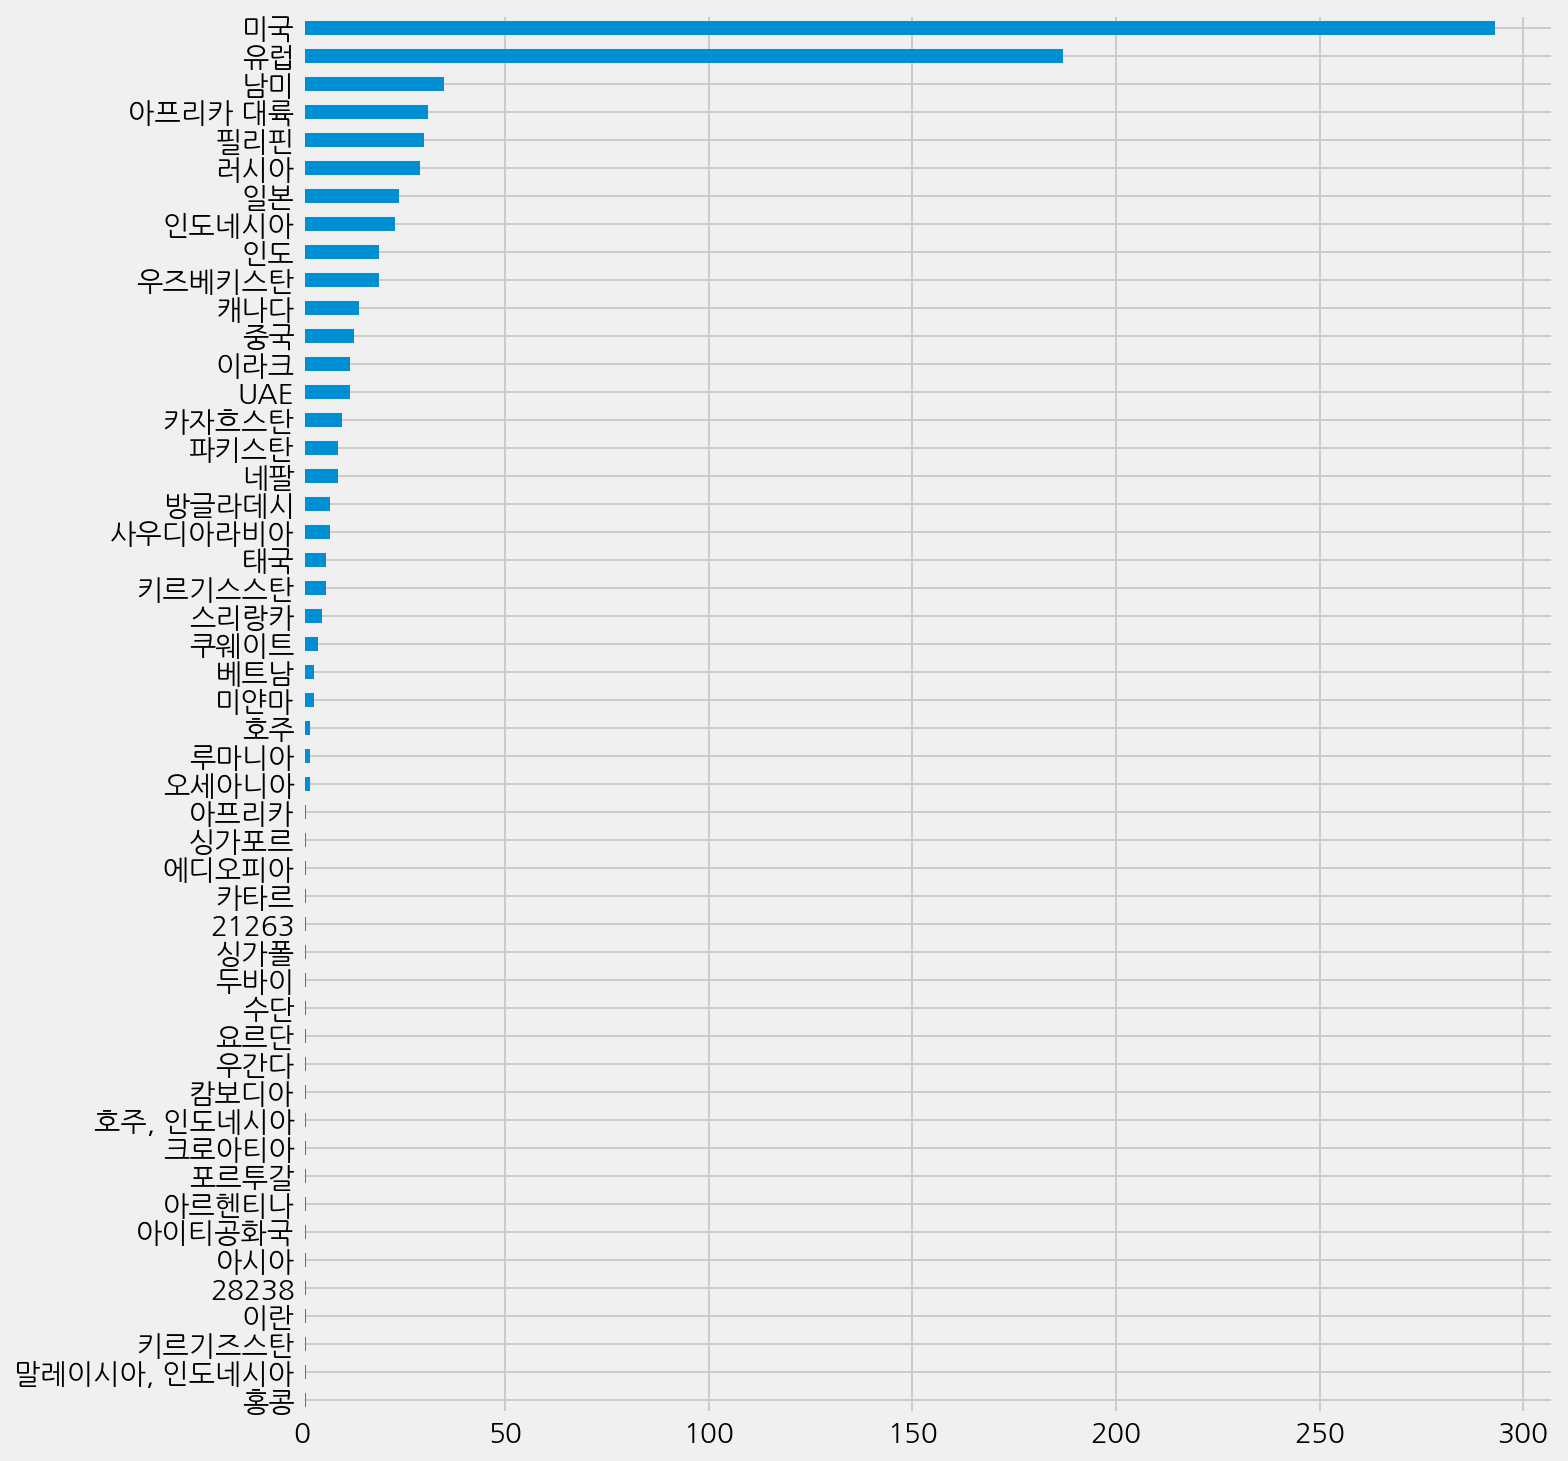

In [207]:
#위에서 구한 빈도수를 시각화한다.
oversea_count.sort_values().plot.barh(figsize=(10, 12))

In [184]:
df_day_oversea = df_day_oversea.set_index("확진일")

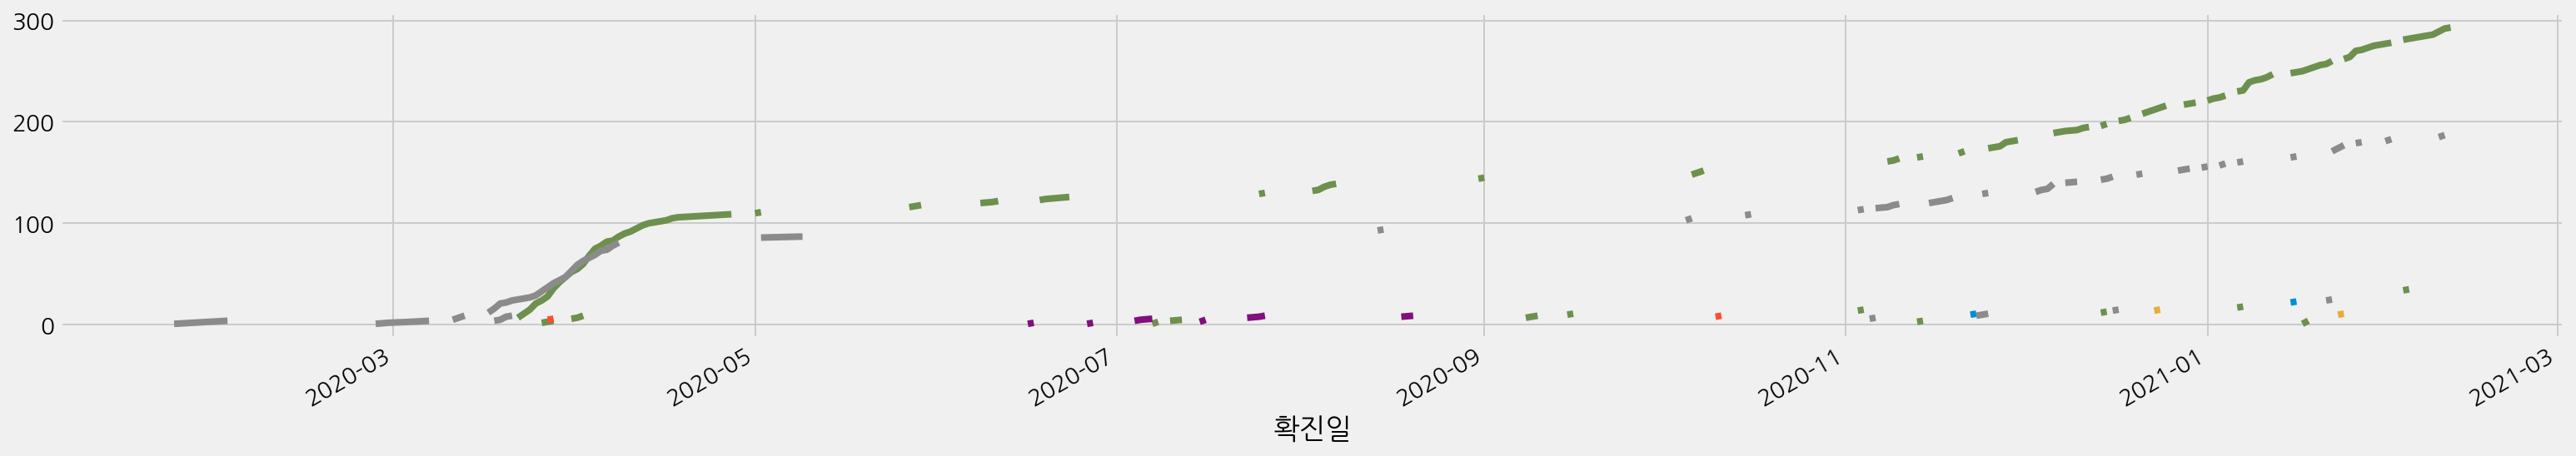

In [185]:
df_day_oversea.pivot(columns="해외").plot(figsize=(24, 4), legend=False)

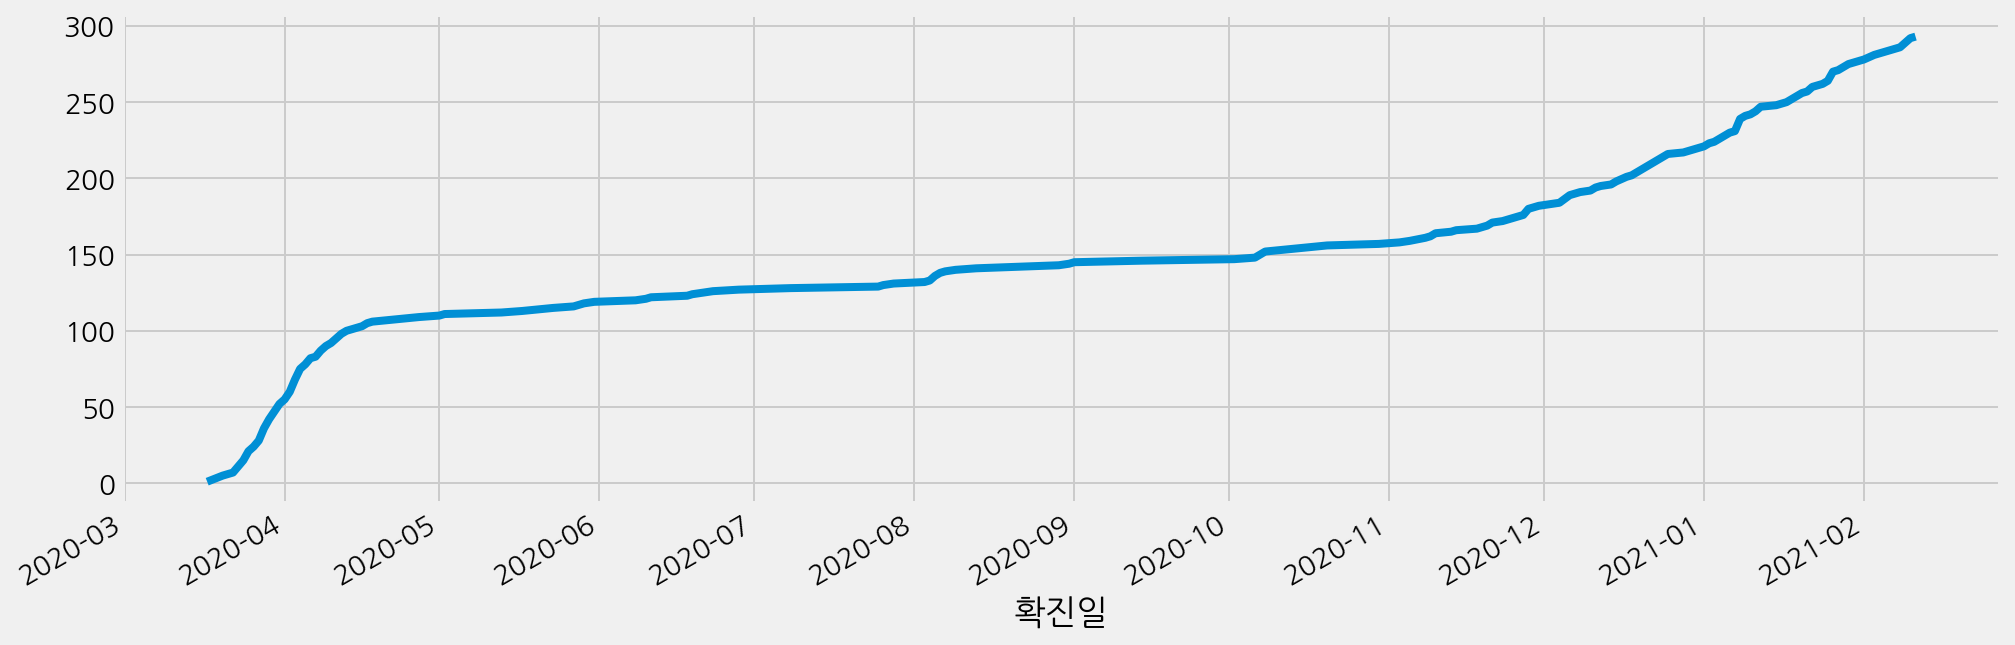

In [186]:
df_day_oversea.loc[df_day_oversea["해외"] == "미국", "누적확진수"].plot()

In [208]:
oversea_count_gu = df_oversea["거주지"].value_counts()
oversea_count_gu.head()

강남구    84
용산구    68
기타     68
마포구    65
서초구    49
Name: 거주지, dtype: int64

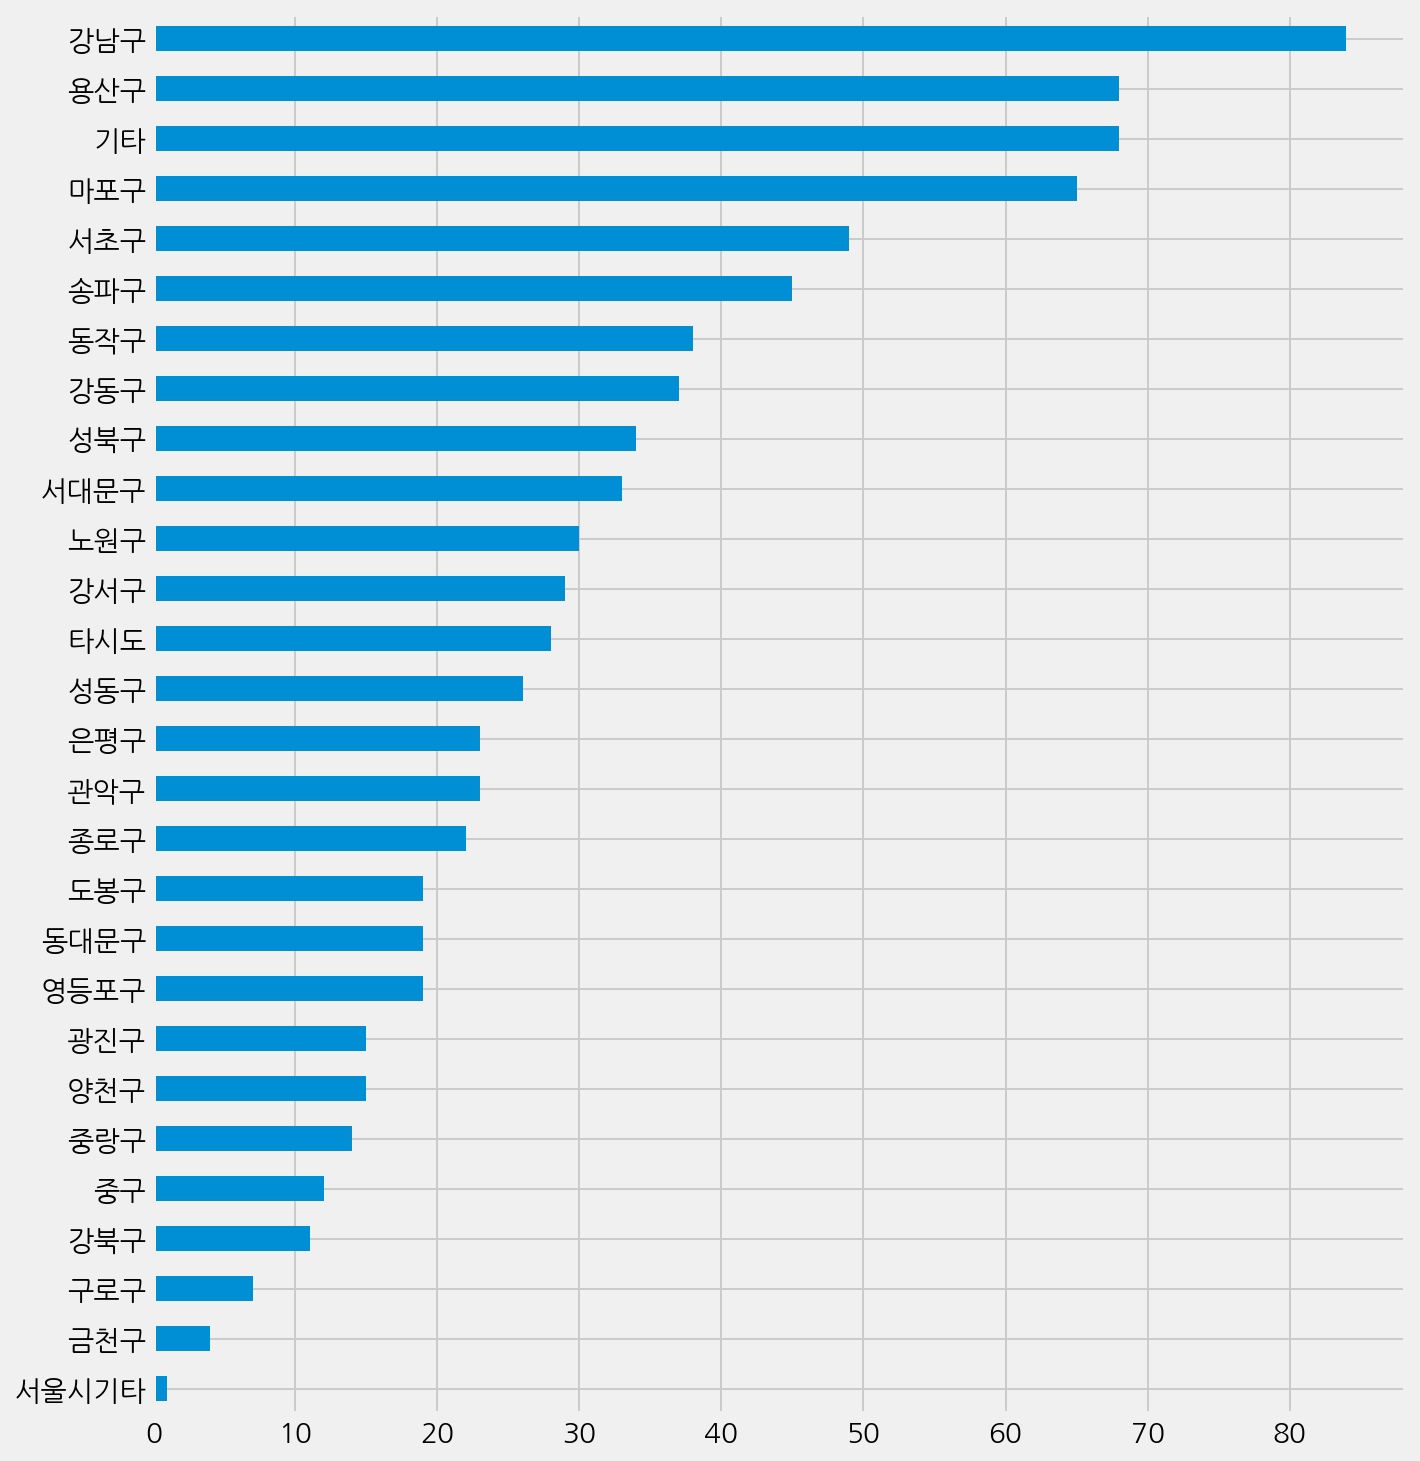

In [209]:
#"해외유입 구별 확진자" 시각화 하기
oversea_count_gu.sort_values().plot.barh(figsize=(10, 12))

### 전체 확진수와 해외유입 확진수 비교

In [211]:
#all_count_gu 변수에 전체 지역의 확진자수 구하기
all_count_gu = df["거주지"].value_counts()

In [212]:
#데이터프레임으로 변환하고 컬럼명 변경하기
df_all_gu = all_count_gu.to_frame()
df_all_gu.columns = ["전체확진수"]
df_all_gu

,전체확진수
기타,1935
강서구,1597
송파구,1436
관악구,1253
타시도,1216
강남구,1206
성북구,1105
노원구,1104
중랑구,1098
동작구,1067


In [213]:
#해외유입확진수 구하기
df_oversea_gu = pd.DataFrame({"해외유입확진수" : oversea_count_gu})

### merge를 통해 전체 확진수와 해외유입 확진수 비교하기

데이터 프레임을 합치기 위해서는 pandas에서 제공하는 merge 함수를 실행할 것이다.
pd.merge(df1,df2, how='' on='')

how의 옵션
- outer:  id를 기준으로 합치되, 어느한쪽에라도 없는 데이터가 있는 경우 NaN값이 지정된다.
- left: 왼쪽 데이터 기준 
- right: 오른쪽 데이터 기준
- on 인자에는 공통적인 열 명을 준다.

left_index=False, # 만약 True 라면, 왼쪽 DataFrame의 index를 merge Key로 사용

right_index=False, # 만약 True 라면, 오른쪽 DataFrame의 index를 merge Key로 사용

In [214]:
# merge 로 합쳐서 전체확진수와 해외유입확진수 비교해 보기
df_all_oversea_case = df_all_gu.merge(df_oversea_gu, left_index=True, right_index=True)
df_all_oversea_case.head()

,전체확진수,해외유입확진수
기타,1935,68
강서구,1597,29
송파구,1436,45
관악구,1253,23
타시도,1216,28


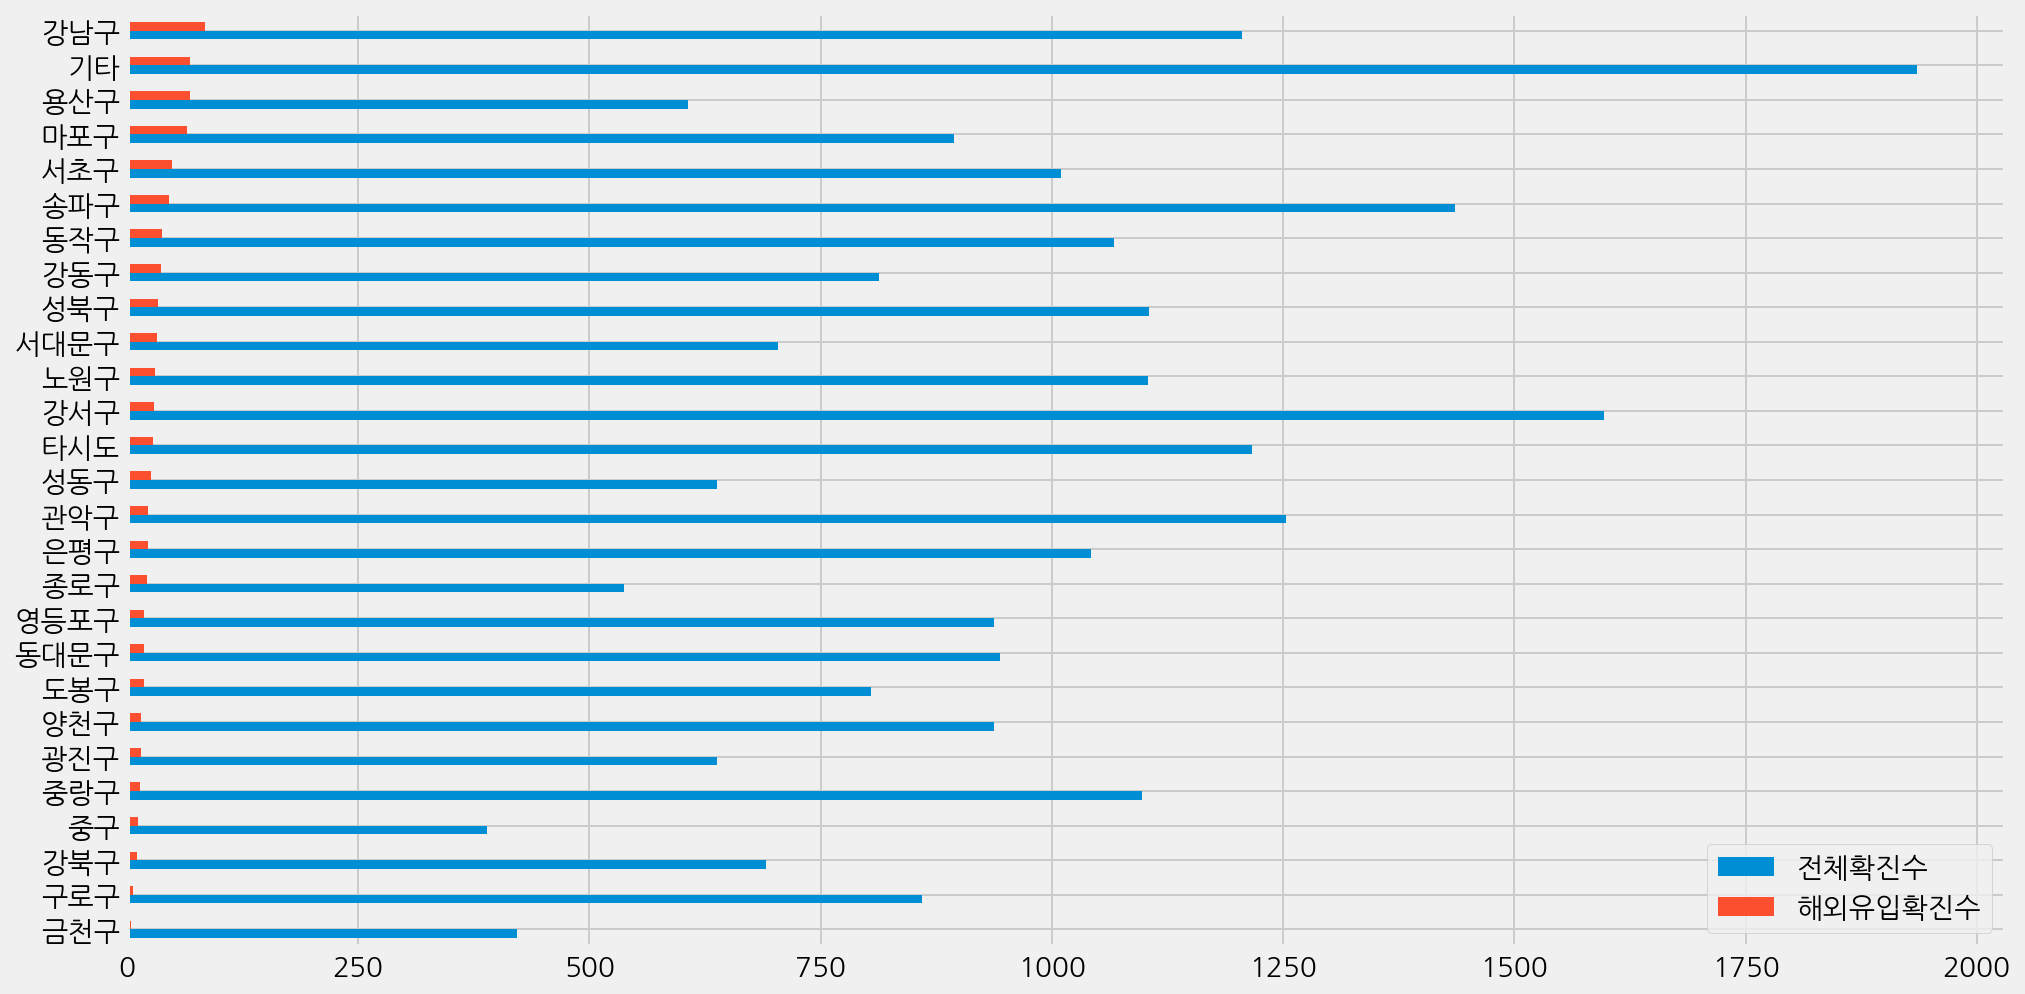

In [215]:
# 시각화 하기
df_all_oversea_case.sort_values(by="해외유입확진수").plot.barh(figsize=(15, 8))

In [216]:
#df_all_oversea_case["해외유입비율"] 구하기
df_all_oversea_case["해외유입비율"] = (df_all_oversea_case["해외유입확진수"] / df_all_oversea_case["전체확진수"]) * 100
df_all_oversea_case.sort_values(by="해외유입비율", ascending=False).head(10)

,전체확진수,해외유입확진수,해외유입비율
용산구,607,68,11.202636
마포구,894,65,7.270694
강남구,1206,84,6.965174
서초구,1010,49,4.851485
서대문구,704,33,4.687500
강동구,813,37,4.551046
종로구,537,22,4.096834
성동구,638,26,4.075235
동작구,1067,38,3.561387
기타,1935,68,3.514212


#### folium을 이용하여 해외유입비율 cloropeleth map으로 시각화하기

southkorea에서 제공하는 서울시 행정구역 json을 사용한다.

* 단, '기타'와 '타시도'는 행정구역에 속하지 않으므로 제외한다.

In [227]:
#folium 설치
import folium

In [228]:
#seoul_municipalities_geo_simple.json 불러오기
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [234]:
#df_all_oversea에서 '기타와 '타시도' 제외하기
#구 이름
seoul_oversea_case = df_all_oversea_case.drop(['기타','타시도'])

,전체확진수,해외유입확진수,해외유입비율
강서구,1597,29,1.815905
송파구,1436,45,3.133705
관악구,1253,23,1.835595
강남구,1206,84,6.965174
성북구,1105,34,3.076923
노원구,1104,30,2.717391
중랑구,1098,14,1.275046
동작구,1067,38,3.561387
은평구,1042,23,2.207294
서초구,1010,49,4.851485


In [239]:
seoul_oversea_case = seoul_oversea_case.rename_axis("name").reset_index()
seoul_oversea_case

,name,전체확진수,해외유입확진수,해외유입비율
0,강서구,1597,29,1.815905
1,송파구,1436,45,3.133705
2,관악구,1253,23,1.835595
3,강남구,1206,84,6.965174
4,성북구,1105,34,3.076923
5,노원구,1104,30,2.717391
6,중랑구,1098,14,1.275046
7,동작구,1067,38,3.561387
8,은평구,1042,23,2.207294
9,서초구,1010,49,4.851485


In [241]:
#서울시 중심부의 위도, 경도를 찾는다.
#location은 서울시 중심부의 위도 경도, zoom 레벨은 11로 시작
m=folium.Map(location=[37.541, 126.986], tiles='cartodbpositron',zoom_start=11)

#choropleth 레이어 생성 후 맵에 추가
folium.Choropleth(
    geo_data=state_geo,
    data=seoul_oversea_case,
    columns=('name', '해외유입비율'),
    key_on='feature.properties.name',
    fill_color='BuPu',
    legend_name='해외유입비율',
).add_to(m)

#맵 m 출력
m

### 월별 해외 확진자 수

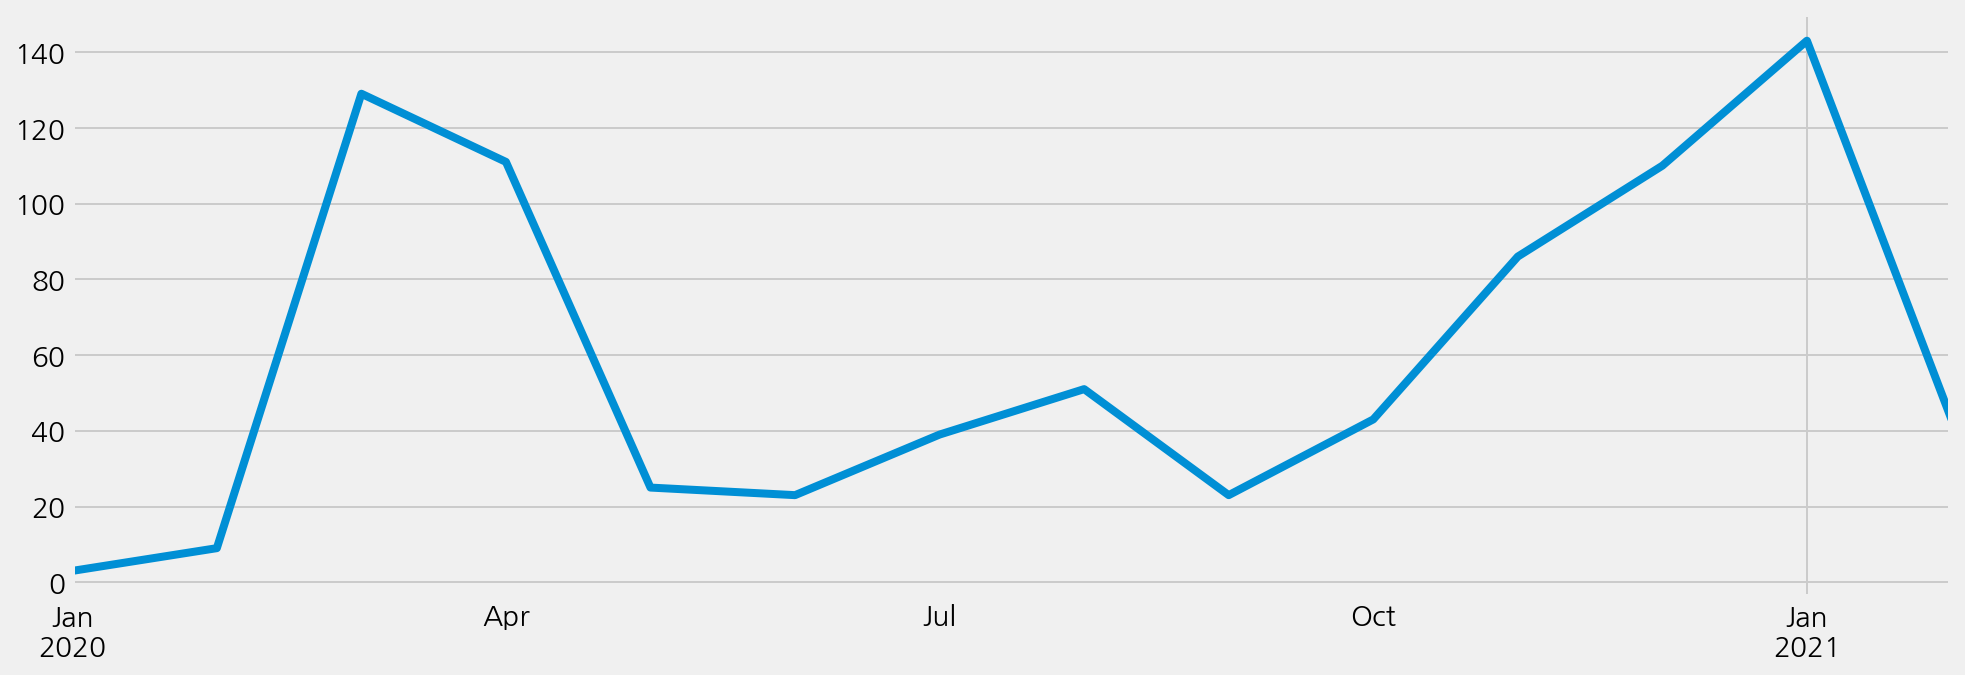

In [218]:
oversea_monthly_case = df_oversea["연월"].value_counts()
oversea_monthly_case.sort_index().plot()

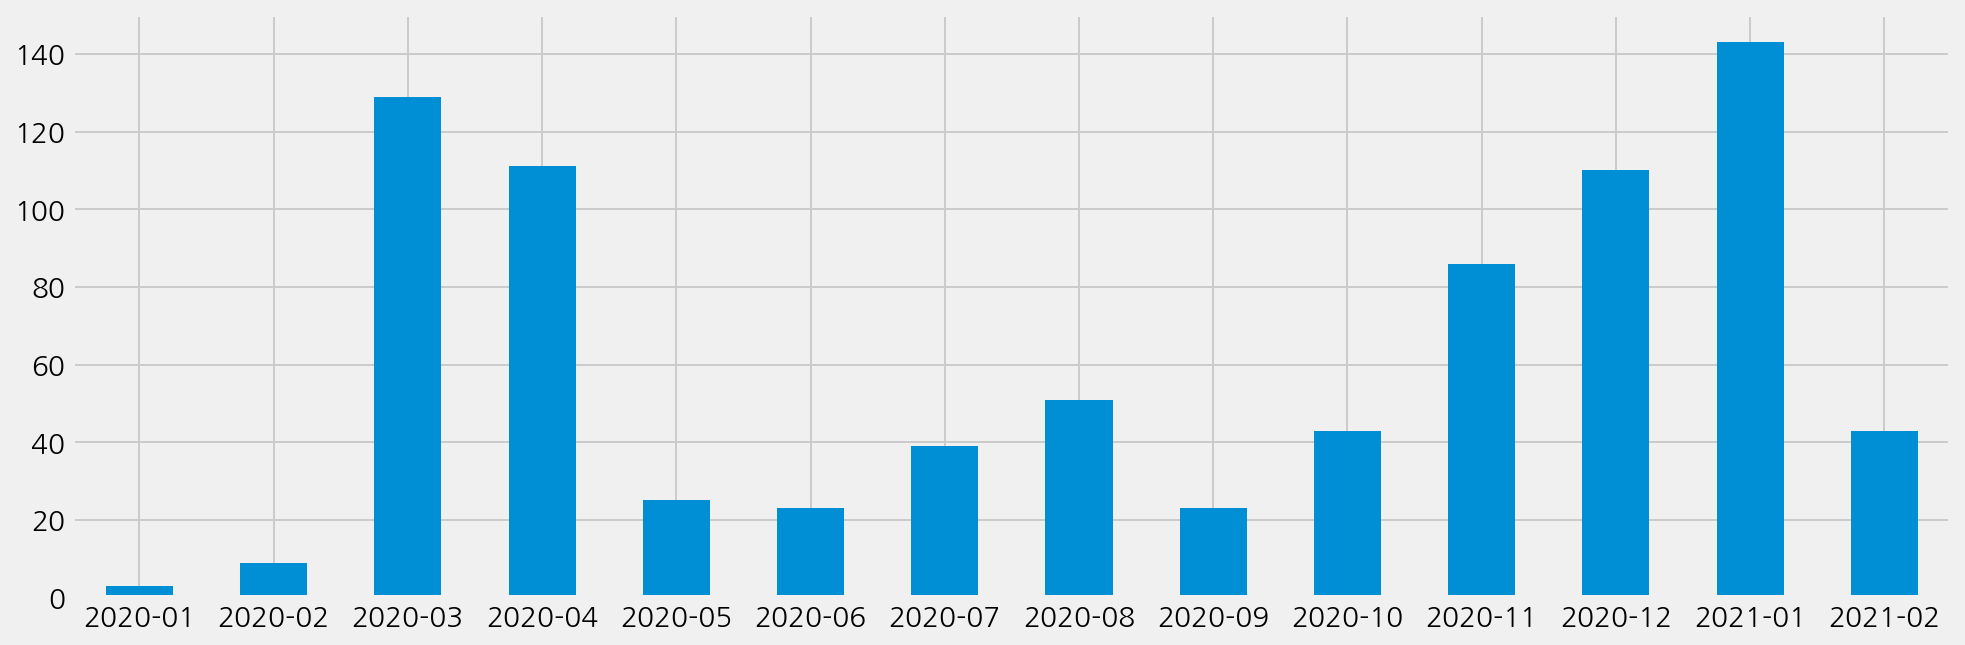

In [219]:
oversea_monthly_case.sort_index().plot.bar(rot=0)

### 구와 월별 해외 확진자 수 구하기

groupby로 빈도수를 구한다.

In [221]:
month_gu = df_oversea.groupby(["월", "거주지"])["연번"].count().unstack()
month_gu = month_gu.fillna(0).astype(int)
month_gu.style.background_gradient(cmap="Purples")

거주지,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서울시기타,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
월,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,13,2,4,5,1,3,2,0,10,7,1,3,6,11,5,0,8,3,12,5,3,8,17,4,6,1,4,2
2,2,4,0,1,1,2,0,2,3,2,1,2,4,5,3,1,0,0,4,2,0,0,7,1,2,0,0,3
3,22,5,1,3,5,4,3,0,2,3,3,2,8,6,2,0,14,2,4,12,1,4,6,2,2,2,5,6
4,16,3,0,3,5,2,0,0,5,2,2,4,4,7,5,0,11,10,5,8,1,3,5,3,0,0,1,6
5,2,2,1,1,0,0,0,0,0,3,2,0,0,1,3,0,1,1,0,1,1,0,5,0,1,0,0,0
6,0,2,0,0,2,0,0,0,1,2,0,1,0,0,2,0,2,1,1,1,2,1,0,2,1,1,1,0
7,0,4,0,1,1,0,0,0,2,2,1,0,1,7,6,0,1,2,2,0,0,0,2,0,2,2,1,2
8,1,0,0,2,2,1,0,0,13,2,3,2,4,2,0,0,1,0,3,3,1,0,5,1,1,3,0,1
9,4,1,0,0,0,0,0,0,6,1,0,0,4,1,1,0,1,1,0,0,2,0,0,0,0,0,0,1


### 해외 유입이 많은 지역(구)

In [222]:
#상위 10개 지역
top_oversea_gu = df_oversea["거주지"].value_counts().head().index

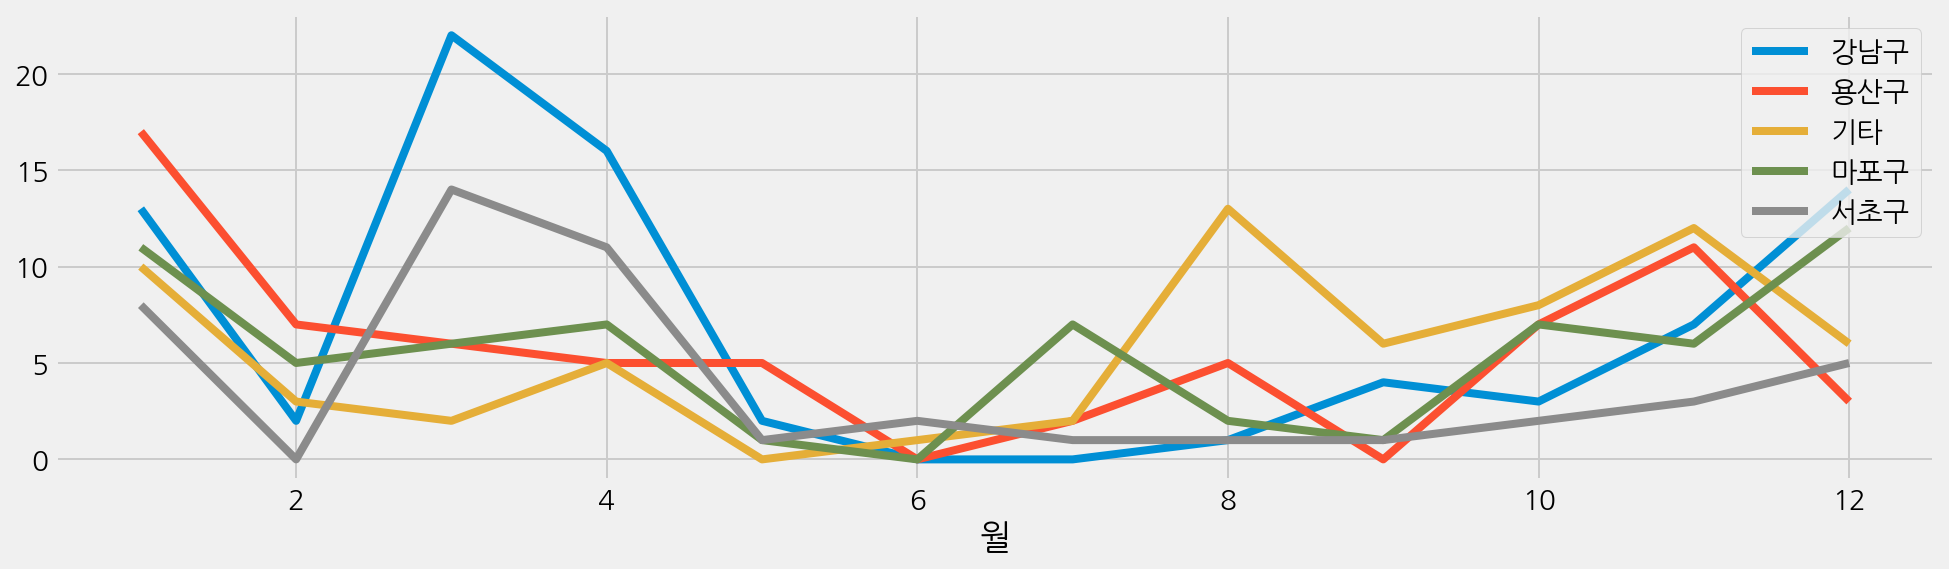

In [224]:
#시각화 하기
g = month_gu[top_oversea_gu].plot(figsize=(15, 4))
g.legend(loc=1)

### 구별 해외 유입 국가 분석하기

- groupby로 구하기

In [225]:
group_oversea_gu = df_oversea.groupby(["해외", "거주지"])["연번"].count().unstack()
group_oversea_gu.fillna(0).astype(int)

거주지,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서울시기타,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
해외,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21263,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28238,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
UAE,3,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,3,0,1,0,0,0,1,0
남미,4,1,1,1,1,0,0,0,3,1,3,1,4,6,2,0,1,0,1,1,0,0,0,2,0,0,0,2
네팔,0,0,0,0,0,0,1,0,4,0,0,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
두바이,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
러시아,2,1,0,0,1,0,0,2,2,1,0,1,2,5,1,0,1,0,3,1,0,0,1,1,0,2,1,1
루마니아,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"말레이시아, 인도네시아",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
